In [1]:
from sklearn.svm import SVC
import numpy as np
from sklearn import datasets
import pandas as pd
from ensemble import EnsembleClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from functions import get_labeled_scores, k_fold
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [2]:
# datasety
iris = datasets.load_iris()
cancer = datasets.load_breast_cancer()
wines = datasets.load_wine()
diabetes = pd.read_csv('diabetes.csv')

# Zbiór Iris

In [87]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris['data'])
X = pd.DataFrame(data=scaled_data, columns=iris['feature_names'])
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
max_features=math.floor(math.sqrt(len(X.columns)))

In [88]:
cv = cross_val_score(RandomForestClassifier(n_estimators=10), X, y, cv=3)
get_labeled_scores(cv, round_to=4)

{'Średnia': 0.9667,
 'Odchylenie standardowe': 0.0189,
 'Wartość minimalna': 0.94,
 'Wartość maksymalna': 0.98}

### K-najbliższych sąsiadów

In [89]:
cv = cross_val_score(KNeighborsClassifier(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.96,
 'Odchylenie standardowe': 0.02,
 'Wartość minimalna': 0.94,
 'Wartość maksymalna': 0.98}

Results for Fold 1
Accuracy: 0.96
 Macro precision: 0.9569444444444445
 Macro recall: 0.9569444444444445 
 Macro f1-score: 0.9569444444444445


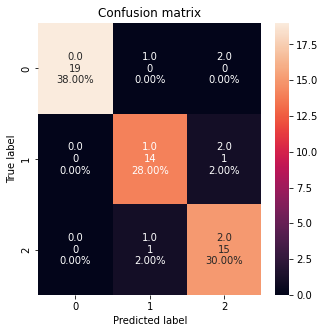

Results for Fold 2
Accuracy: 0.92
 Macro precision: 0.9163398692810457
 Macro recall: 0.9163398692810457 
 Macro f1-score: 0.9163398692810457


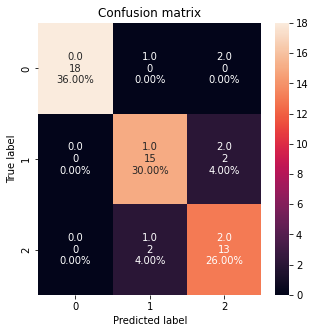

Results for Fold 3
Accuracy: 0.94
 Macro precision: 0.9473684210526315
 Macro recall: 0.938296596191333 
 Macro f1-score: 0.9420957799905169


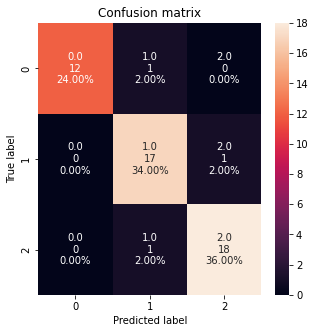


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean   0.94000   0.940218  0.937194  0.938460
1   std   0.01633   0.017331  0.016595  0.016775
2   min   0.92000   0.916340  0.916340  0.916340
3   max   0.96000   0.956944  0.956944  0.956944


In [90]:
k_fold(X, y, model=EnsembleClassifier(KNeighborsClassifier()))

Results for Fold 1
Accuracy: 0.94
 Macro precision: 0.9369747899159663
 Macro recall: 0.9347222222222222 
 Macro f1-score: 0.9352142110762801


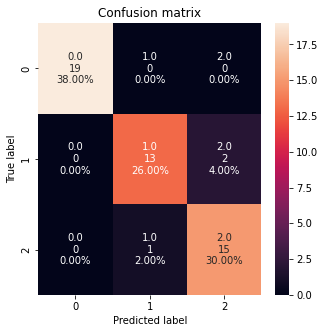

Results for Fold 2
Accuracy: 0.92
 Macro precision: 0.9163398692810457
 Macro recall: 0.9163398692810457 
 Macro f1-score: 0.9163398692810457


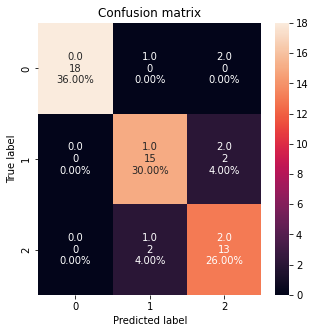

Results for Fold 3
Accuracy: 0.96
 Macro precision: 0.9639376218323586
 Macro recall: 0.9639376218323586 
 Macro f1-score: 0.9639376218323586


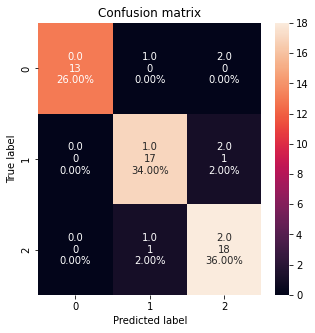


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean   0.94000   0.939084  0.938333  0.938497
1   std   0.01633   0.019489  0.019599  0.019570
2   min   0.92000   0.916340  0.916340  0.916340
3   max   0.96000   0.963938  0.963938  0.963938


In [91]:
k_fold(X, y, model=BaggingClassifier(KNeighborsClassifier(), n_estimators=10, max_features = max_features))

In [92]:
bag = BaggingClassifier(KNeighborsClassifier(), max_features = max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(KNeighborsClassifier()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0301,
 'Odchylenie standardowe': 0.0531,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.24}

### Drzewo decyzyjne

In [93]:
cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.95,
 'Odchylenie standardowe': 0.02,
 'Wartość minimalna': 0.92,
 'Wartość maksymalna': 0.98}

Results for Fold 1
Accuracy: 0.96
 Macro precision: 0.9607843137254902
 Macro recall: 0.9583333333333334 
 Macro f1-score: 0.9569444444444445


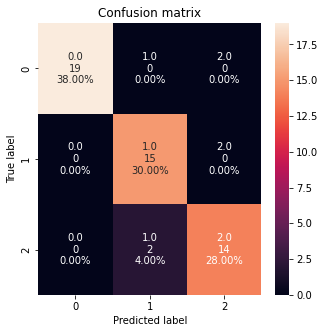

Results for Fold 2
Accuracy: 0.96
 Macro precision: 0.9581699346405229
 Macro recall: 0.9581699346405229 
 Macro f1-score: 0.9581699346405229


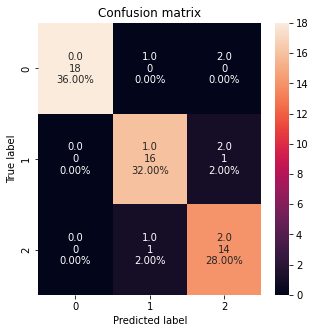

Results for Fold 3
Accuracy: 0.98
 Macro precision: 0.9833333333333334
 Macro recall: 0.9814814814814815 
 Macro f1-score: 0.981929181929182


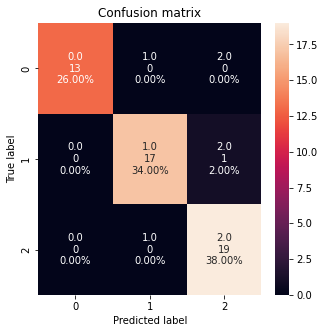


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.966667   0.967429  0.965995  0.965681
1   std  0.009428   0.011296  0.010951  0.011500
2   min  0.960000   0.958170  0.958170  0.956944
3   max  0.980000   0.983333  0.981481  0.981929


In [94]:
k_fold(X, y, model=EnsembleClassifier(DecisionTreeClassifier()))

Results for Fold 1
Accuracy: 0.96
 Macro precision: 0.9569444444444445
 Macro recall: 0.9569444444444445 
 Macro f1-score: 0.9569444444444445


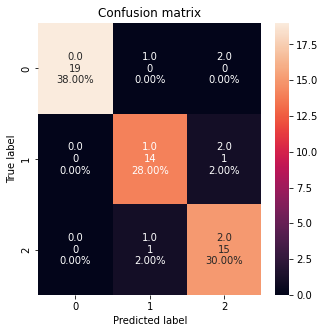

Results for Fold 2
Accuracy: 0.92
 Macro precision: 0.9163398692810457
 Macro recall: 0.9163398692810457 
 Macro f1-score: 0.9163398692810457


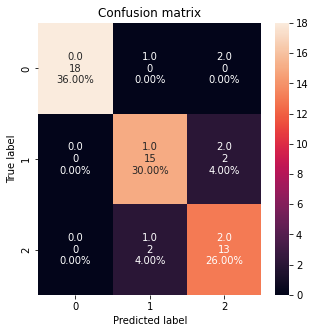

Results for Fold 3
Accuracy: 0.92
 Macro precision: 0.930392156862745
 Macro recall: 0.9288499025341131 
 Macro f1-score: 0.9278752436647174


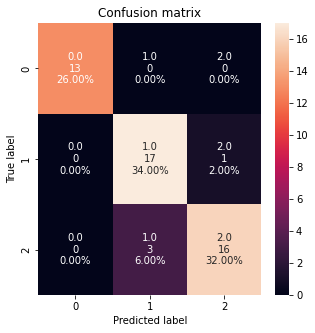


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.933333   0.934559  0.934045  0.933720
1   std  0.018856   0.016837  0.016979  0.017084
2   min  0.920000   0.916340  0.916340  0.916340
3   max  0.960000   0.956944  0.956944  0.956944


In [95]:
k_fold(X, y, model=BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, max_features = max_features))

In [96]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(DecisionTreeClassifier()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0372,
 'Odchylenie standardowe': 0.0984,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.6667}

### Regresja logistyczna

In [97]:
cv = cross_val_score(LogisticRegression(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.97,
 'Odchylenie standardowe': 0.01,
 'Wartość minimalna': 0.96,
 'Wartość maksymalna': 0.98}

Results for Fold 1
Accuracy: 1.0
 Macro precision: 1.0
 Macro recall: 1.0 
 Macro f1-score: 1.0


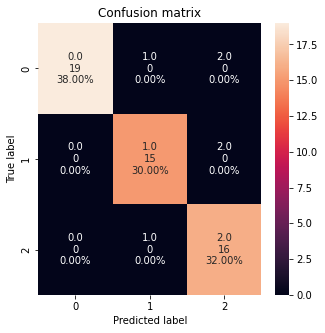

Results for Fold 2
Accuracy: 0.92
 Macro precision: 0.9163398692810457
 Macro recall: 0.9163398692810457 
 Macro f1-score: 0.9163398692810457


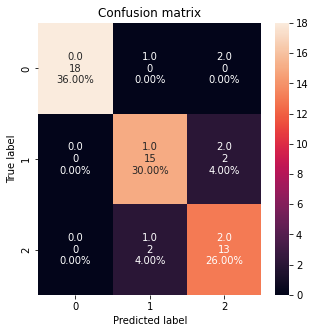

Results for Fold 3
Accuracy: 0.98
 Macro precision: 0.9824561403508771
 Macro recall: 0.9824561403508771 
 Macro f1-score: 0.981981981981982


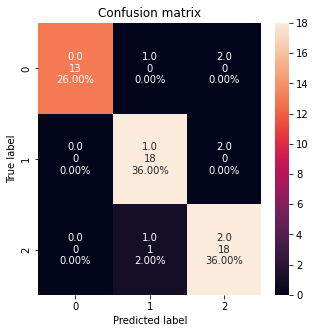


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.966667   0.966265  0.966265  0.966107
1   std  0.033993   0.036022  0.036022  0.035951
2   min  0.920000   0.916340  0.916340  0.916340
3   max  1.000000   1.000000  1.000000  1.000000


In [68]:
k_fold(X, y, model=EnsembleClassifier(LogisticRegression()))

Results for Fold 1
Accuracy: 0.9
 Macro precision: 0.9020467836257309
 Macro recall: 0.8902777777777778 
 Macro f1-score: 0.890652557319224


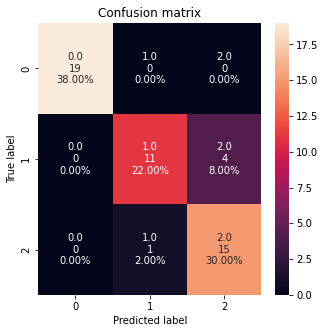

Results for Fold 2
Accuracy: 0.92
 Macro precision: 0.918954248366013
 Macro recall: 0.918954248366013 
 Macro f1-score: 0.9166666666666666


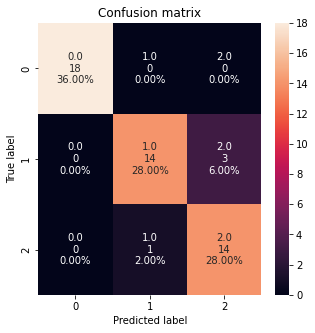

Results for Fold 3
Accuracy: 0.96
 Macro precision: 0.9639376218323586
 Macro recall: 0.9639376218323586 
 Macro f1-score: 0.9639376218323586


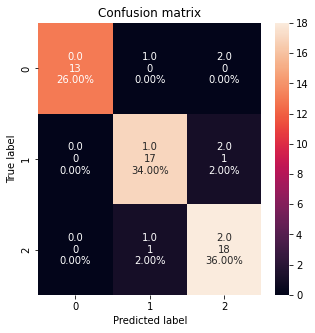


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.926667   0.928313  0.924390  0.923752
1   std  0.024944   0.026119  0.030316  0.030335
2   min  0.900000   0.902047  0.890278  0.890653
3   max  0.960000   0.963938  0.963938  0.963938


In [70]:
k_fold(X, y, model=BaggingClassifier(LogisticRegression(), n_estimators=10, max_features = max_features))

In [71]:
bag = BaggingClassifier(LogisticRegression(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(LogisticRegression()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0167,
 'Odchylenie standardowe': 0.015,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.0499}

### Naiwny klasyfikator bayesowski

In [73]:
cv = cross_val_score(GaussianNB(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.94,
 'Odchylenie standardowe': 0.02,
 'Wartość minimalna': 0.92,
 'Wartość maksymalna': 0.96}

Results for Fold 1
Accuracy: 0.98
 Macro precision: 0.9791666666666666
 Macro recall: 0.9791666666666666 
 Macro f1-score: 0.978494623655914


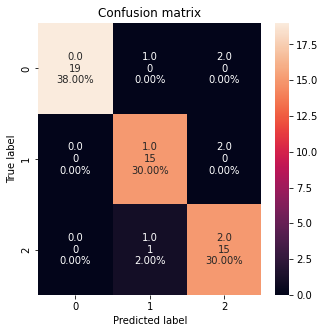

Results for Fold 2
Accuracy: 0.92
 Macro precision: 0.9163398692810457
 Macro recall: 0.9163398692810457 
 Macro f1-score: 0.9163398692810457


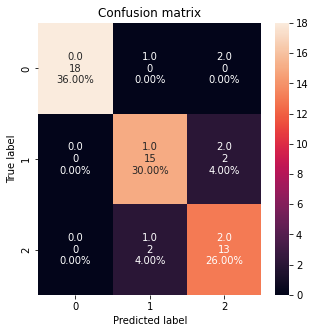

Results for Fold 3
Accuracy: 0.98
 Macro precision: 0.9824561403508771
 Macro recall: 0.9824561403508771 
 Macro f1-score: 0.981981981981982


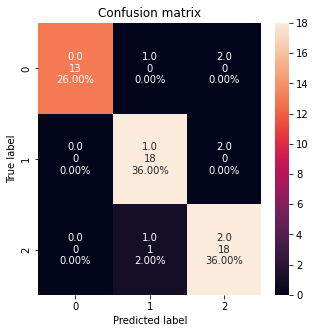


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.960000   0.959321  0.959321  0.958939
1   std  0.028284   0.030422  0.030422  0.030156
2   min  0.920000   0.916340  0.916340  0.916340
3   max  0.980000   0.982456  0.982456  0.981982


In [74]:
k_fold(X, y, model=EnsembleClassifier(GaussianNB()))

Results for Fold 1
Accuracy: 0.96
 Macro precision: 0.9569444444444445
 Macro recall: 0.9569444444444445 
 Macro f1-score: 0.9569444444444445


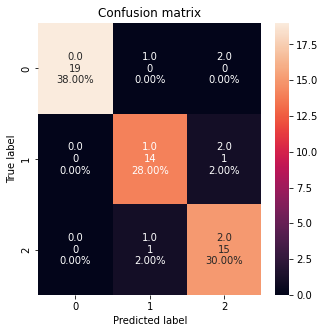

Results for Fold 2
Accuracy: 0.92
 Macro precision: 0.9163398692810457
 Macro recall: 0.9163398692810457 
 Macro f1-score: 0.9163398692810457


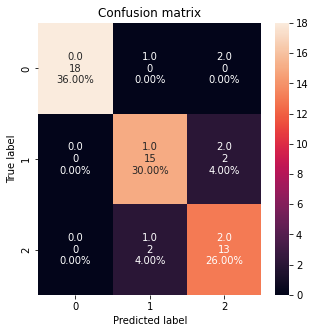

Results for Fold 3
Accuracy: 0.96
 Macro precision: 0.9639376218323586
 Macro recall: 0.9639376218323586 
 Macro f1-score: 0.9639376218323586


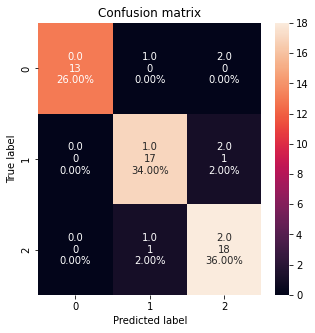


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.946667   0.945741  0.945741  0.945741
1   std  0.018856   0.020985  0.020985  0.020985
2   min  0.920000   0.916340  0.916340  0.916340
3   max  0.960000   0.963938  0.963938  0.963938


In [75]:
k_fold(X, y, model=BaggingClassifier(GaussianNB(), n_estimators=10, max_features = max_features))

In [76]:
bag = BaggingClassifier(GaussianNB(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(GaussianNB()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0182,
 'Odchylenie standardowe': 0.0251,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.0955}

### SVM

In [77]:
cv = cross_val_score(SVC(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.97,
 'Odchylenie standardowe': 0.01,
 'Wartość minimalna': 0.96,
 'Wartość maksymalna': 0.98}

Results for Fold 1
Accuracy: 0.98
 Macro precision: 0.9791666666666666
 Macro recall: 0.9791666666666666 
 Macro f1-score: 0.978494623655914


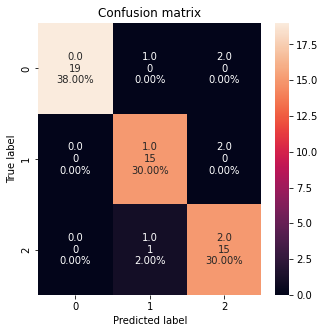

Results for Fold 2
Accuracy: 0.9
 Macro precision: 0.8968253968253969
 Macro recall: 0.8941176470588236 
 Macro f1-score: 0.8949096880131364


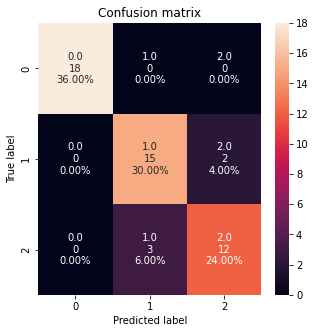

Results for Fold 3
Accuracy: 0.98
 Macro precision: 0.9824561403508771
 Macro recall: 0.9824561403508771 
 Macro f1-score: 0.981981981981982


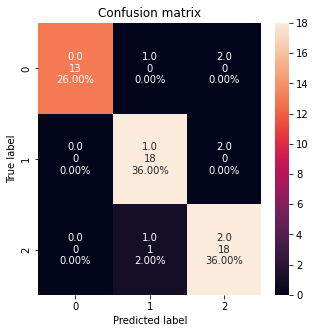


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.953333   0.952816  0.951913  0.951795
1   std  0.037712   0.039614  0.040890  0.040249
2   min  0.900000   0.896825  0.894118  0.894910
3   max  0.980000   0.982456  0.982456  0.981982


In [78]:
k_fold(X, y, model=EnsembleClassifier(SVC()))

Results for Fold 1
Accuracy: 0.98
 Macro precision: 0.9791666666666666
 Macro recall: 0.9791666666666666 
 Macro f1-score: 0.978494623655914


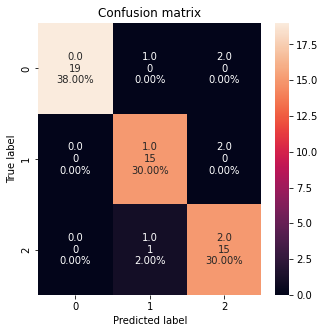

Results for Fold 2
Accuracy: 0.9
 Macro precision: 0.8958333333333334
 Macro recall: 0.8967320261437909 
 Macro f1-score: 0.8957315086347345


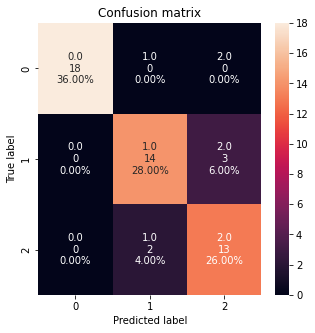

Results for Fold 3
Accuracy: 0.94
 Macro precision: 0.9523809523809524
 Macro recall: 0.9392712550607287 
 Macro f1-score: 0.9425071225071225


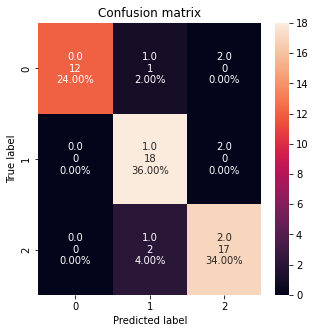


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean   0.94000   0.942460  0.938390  0.938911
1   std   0.03266   0.034736  0.033660  0.033883
2   min   0.90000   0.895833  0.896732  0.895732
3   max   0.98000   0.979167  0.979167  0.978495


In [79]:
k_fold(X, y, model=BaggingClassifier(SVC(), n_estimators=10, max_features = max_features))

In [81]:
bag = BaggingClassifier(SVC(probability=True), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(SVC(probability=True)).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0183,
 'Odchylenie standardowe': 0.0201,
 'Wartość minimalna': 0.0003,
 'Wartość maksymalna': 0.1488}

# Zbiór Breast Cancer

In [99]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancer['data'])
X = pd.DataFrame(data=scaled_data, columns=cancer['feature_names'])
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
max_features=math.floor(math.sqrt(len(X.columns)))

In [101]:
cv = cross_val_score(RandomForestClassifier(n_estimators=10), X, y, cv=3)
get_labeled_scores(cv, round_to=4)

{'Średnia': 0.9473,
 'Odchylenie standardowe': 0.0114,
 'Wartość minimalna': 0.9368,
 'Wartość maksymalna': 0.9632}

### K-najbliższych sąsiadów

In [102]:
cv = cross_val_score(KNeighborsClassifier(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.96,
 'Odchylenie standardowe': 0.01,
 'Wartość minimalna': 0.96,
 'Wartość maksymalna': 0.97}

Results for Fold 1
Accuracy: 0.9315789473684211
 Macro precision: 0.9295384615384616
 Macro recall: 0.9206846673095468 
 Macro f1-score: 0.9248120300751879


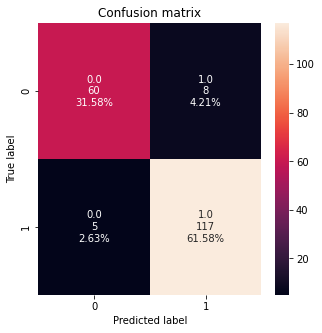

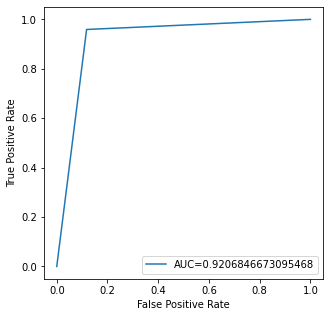

Results for Fold 2
Accuracy: 0.9789473684210527
 Macro precision: 0.9841269841269842
 Macro recall: 0.9705882352941176 
 Macro f1-score: 0.9767839687194526


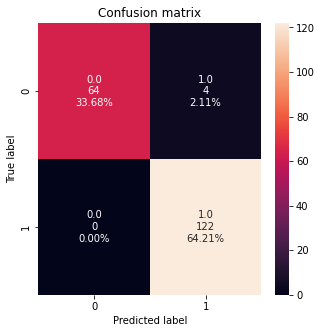

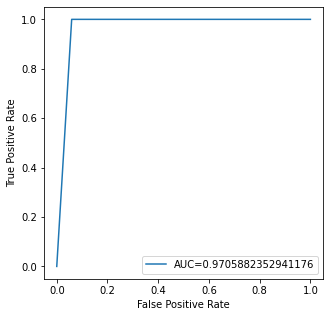

Results for Fold 3
Accuracy: 0.9682539682539683
 Macro precision: 0.9747899159663865
 Macro recall: 0.9605263157894737 
 Macro f1-score: 0.9665210203117619


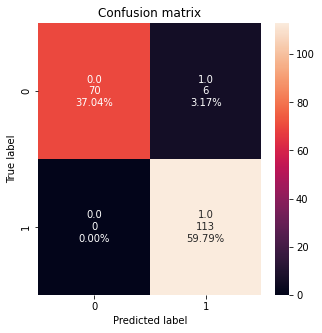

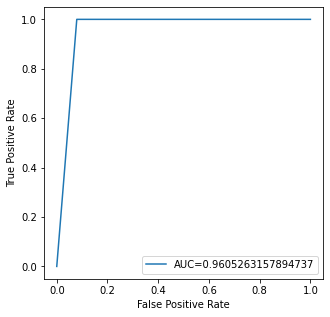


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.959593   0.962818  0.950600  0.956039
1   std  0.020285   0.023839  0.021548  0.022475
2   min  0.931579   0.929538  0.920685  0.924812
3   max  0.978947   0.984127  0.970588  0.976784


In [103]:
k_fold(X, y, model=EnsembleClassifier(KNeighborsClassifier()))

Results for Fold 1
Accuracy: 0.9315789473684211
 Macro precision: 0.9295384615384616
 Macro recall: 0.9206846673095468 
 Macro f1-score: 0.9248120300751879


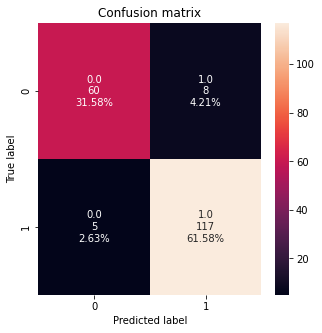

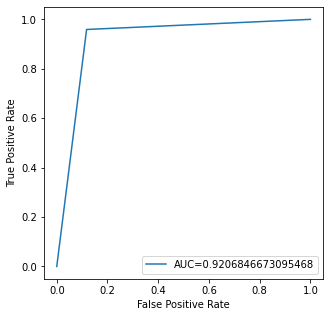

Results for Fold 2
Accuracy: 0.968421052631579
 Macro precision: 0.9765625
 Macro recall: 0.9558823529411764 
 Macro f1-score: 0.964923076923077


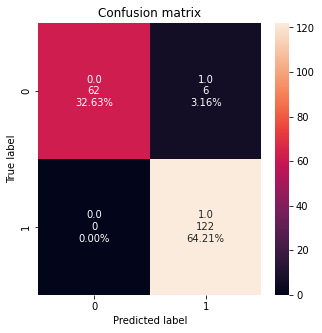

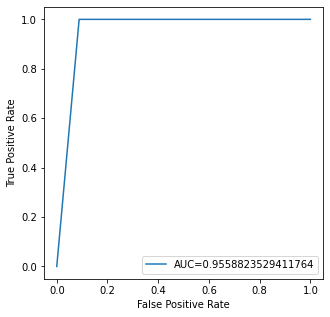

Results for Fold 3
Accuracy: 0.9312169312169312
 Macro precision: 0.9439205955334988
 Macro recall: 0.9166278528178854 
 Macro f1-score: 0.9264745488823054


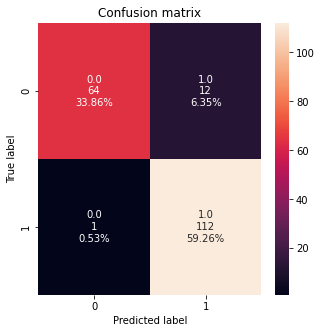

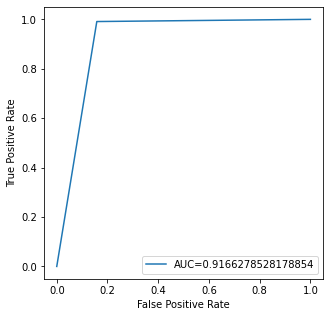


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.943739   0.950007  0.931065  0.938737
1   std  0.017453   0.019674  0.017627  0.018529
2   min  0.931217   0.929538  0.916628  0.924812
3   max  0.968421   0.976562  0.955882  0.964923


In [104]:
k_fold(X, y, model=BaggingClassifier(KNeighborsClassifier(), n_estimators=10, max_features = max_features))

In [105]:
bag = BaggingClassifier(KNeighborsClassifier(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(KNeighborsClassifier()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0543,
 'Odchylenie standardowe': 0.0545,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.3}

### Drzewo decyzyjne

In [106]:
cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.9,
 'Odchylenie standardowe': 0.04,
 'Wartość minimalna': 0.85,
 'Wartość maksymalna': 0.94}

Results for Fold 1
Accuracy: 0.9578947368421052
 Macro precision: 0.9517857142857142
 Macro recall: 0.9574493731918997 
 Macro f1-score: 0.9544855671337885


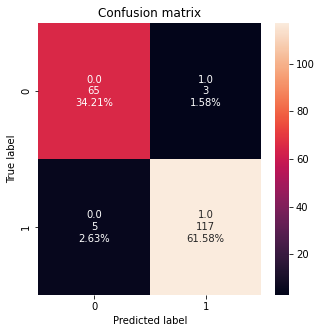

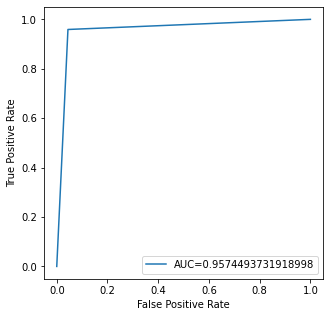

Results for Fold 2
Accuracy: 0.9789473684210527
 Macro precision: 0.980327468230694
 Macro recall: 0.9738428158148505 
 Macro f1-score: 0.9769445455648587


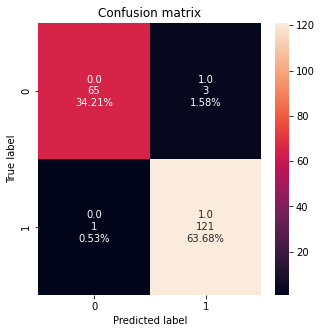

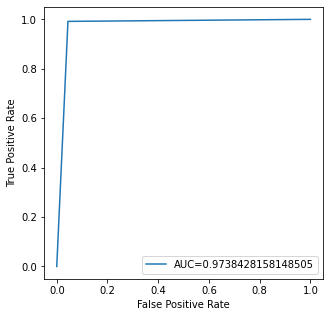

Results for Fold 3
Accuracy: 0.9894179894179894
 Macro precision: 0.991304347826087
 Macro recall: 0.986842105263158 
 Macro f1-score: 0.9889473684210526


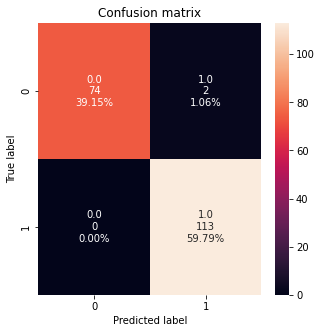

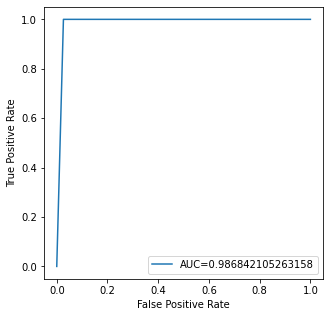


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.975420   0.974473  0.972711  0.973459
1   std  0.013109   0.016656  0.012026  0.014283
2   min  0.957895   0.951786  0.957449  0.954486
3   max  0.989418   0.991304  0.986842  0.988947


In [107]:
k_fold(X, y, model=EnsembleClassifier(DecisionTreeClassifier()))

Results for Fold 1
Accuracy: 0.9315789473684211
 Macro precision: 0.9244819738890886
 Macro recall: 0.9271938283510126 
 Macro f1-score: 0.9258057733321319


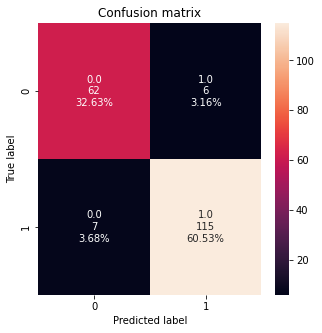

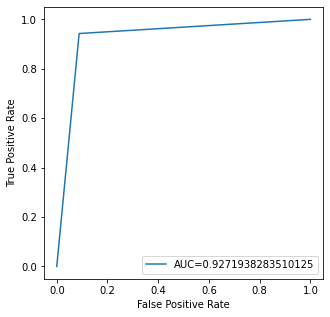

Results for Fold 2
Accuracy: 0.9526315789473684
 Macro precision: 0.9472391903221943
 Macro recall: 0.950096432015429 
 Macro f1-score: 0.9486347661530143


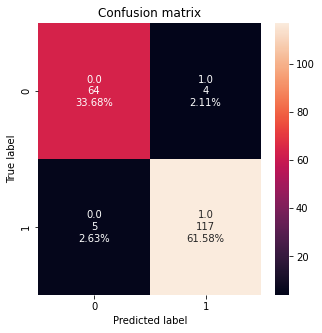

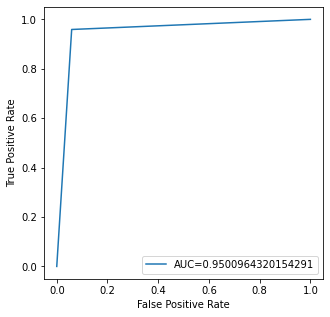

Results for Fold 3
Accuracy: 0.9470899470899471
 Macro precision: 0.9468860164512338
 Macro recall: 0.9428272007452259 
 Macro f1-score: 0.9447368421052631


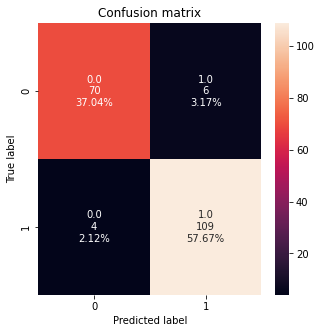

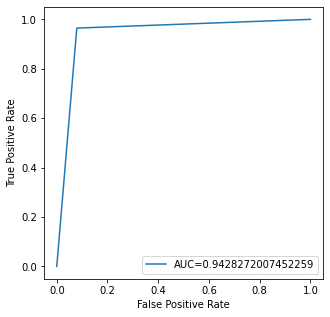


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.943767   0.939536  0.940039  0.939726
1   std  0.008910   0.010646  0.009556  0.009971
2   min  0.931579   0.924482  0.927194  0.925806
3   max  0.952632   0.947239  0.950096  0.948635


In [108]:
k_fold(X, y, model=BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, max_features = max_features))

In [109]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(DecisionTreeClassifier()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0702,
 'Odchylenie standardowe': 0.0879,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.4}

### Regresja logistyczna

In [110]:
cv = cross_val_score(LogisticRegression(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.98,
 'Odchylenie standardowe': 0.0,
 'Wartość minimalna': 0.97,
 'Wartość maksymalna': 0.98}

Results for Fold 1
Accuracy: 0.9631578947368421
 Macro precision: 0.9586177985387472
 Macro recall: 0.9615477338476375 
 Macro f1-score: 0.9600492625634556


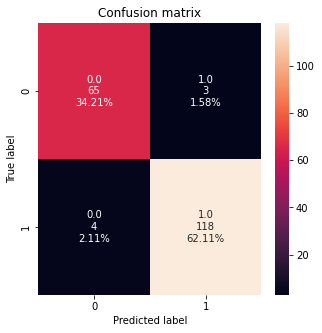

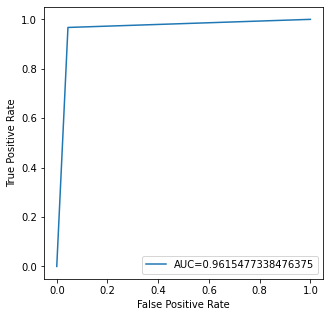

Results for Fold 2
Accuracy: 0.968421052631579
 Macro precision: 0.9723462301587302
 Macro recall: 0.9591369334619093 
 Macro f1-score: 0.9651759530791788


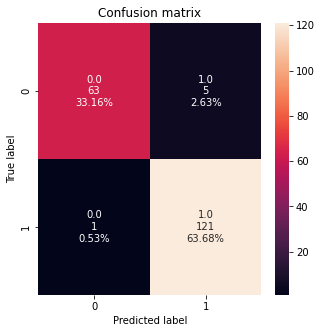

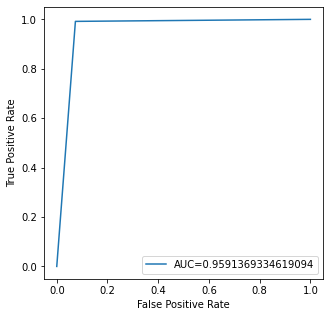

Results for Fold 3
Accuracy: 0.9417989417989417
 Macro precision: 0.9480072463768117
 Macro recall: 0.9319399161620866 
 Macro f1-score: 0.938463815302649


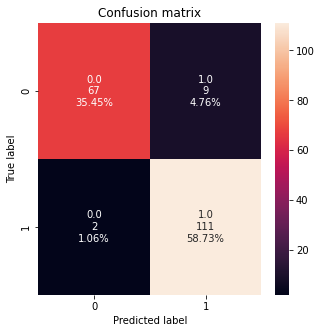

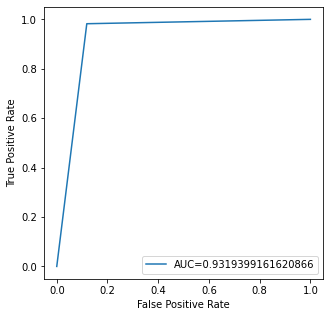


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.957793   0.959657  0.950875  0.954563
1   std  0.011512   0.009963  0.013425  0.011575
2   min  0.941799   0.948007  0.931940  0.938464
3   max  0.968421   0.972346  0.961548  0.965176


In [111]:
k_fold(X, y, model=EnsembleClassifier(LogisticRegression()))

Results for Fold 1
Accuracy: 0.9789473684210527
 Macro precision: 0.9770973963355833
 Macro recall: 0.9770973963355833 
 Macro f1-score: 0.9770973963355833


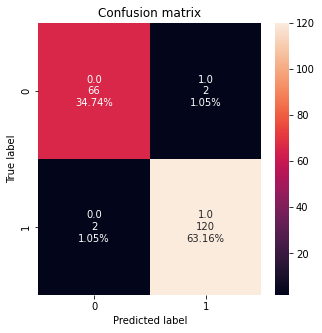

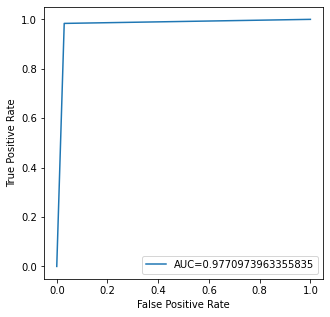

Results for Fold 2
Accuracy: 0.9526315789473684
 Macro precision: 0.9607955267505401
 Macro recall: 0.9370781099324976 
 Macro f1-score: 0.9471879922171778


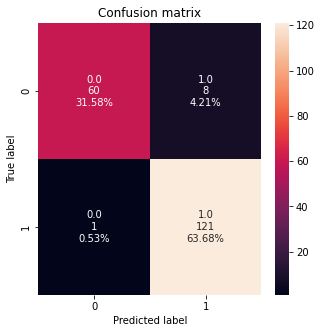

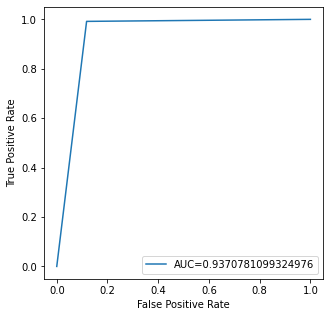

Results for Fold 3
Accuracy: 0.9312169312169312
 Macro precision: 0.939992659652557
 Macro recall: 0.9187820214252445 
 Macro f1-score: 0.9268858800773694


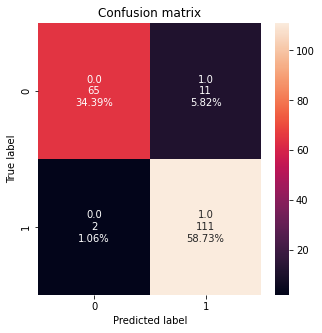

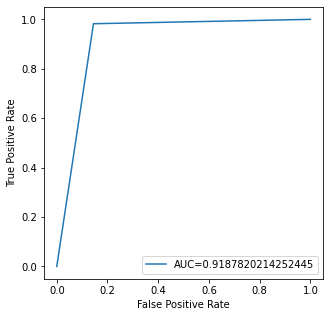


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.954265   0.959295  0.944319  0.950390
1   std  0.019520   0.015185  0.024352  0.020623
2   min  0.931217   0.939993  0.918782  0.926886
3   max  0.978947   0.977097  0.977097  0.977097


In [112]:
k_fold(X, y, model=BaggingClassifier(LogisticRegression(), n_estimators=10, max_features = max_features))

In [113]:
bag = BaggingClassifier(LogisticRegression(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(LogisticRegression()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.037,
 'Odchylenie standardowe': 0.0336,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.2406}

### Naiwny klasyfikator bayesowski

In [114]:
cv = cross_val_score(GaussianNB(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.93,
 'Odchylenie standardowe': 0.02,
 'Wartość minimalna': 0.91,
 'Wartość maksymalna': 0.95}

Results for Fold 1
Accuracy: 0.9263157894736842
 Macro precision: 0.9222873900293255
 Macro recall: 0.916586306653809 
 Macro f1-score: 0.9193059094770052


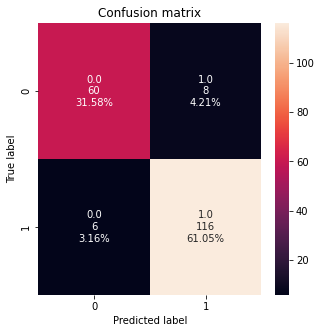

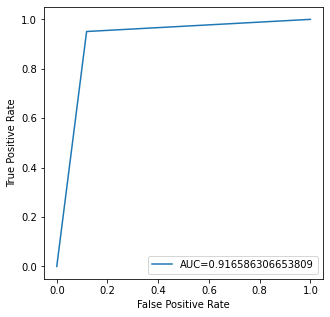

Results for Fold 2
Accuracy: 0.9526315789473684
 Macro precision: 0.9498240504793107
 Macro recall: 0.9468418514946962 
 Macro f1-score: 0.9482993197278912


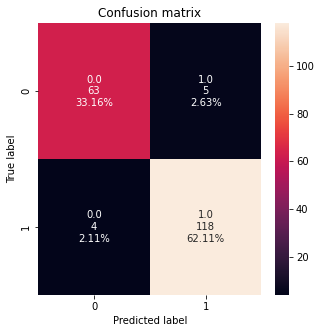

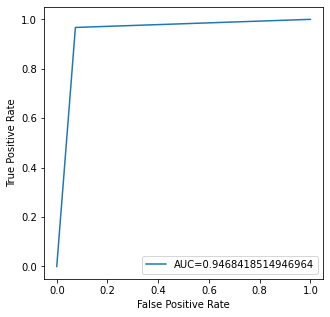

Results for Fold 3
Accuracy: 0.9365079365079365
 Macro precision: 0.9407563025210084
 Macro recall: 0.9275151374010246 
 Macro f1-score: 0.9330420406235238


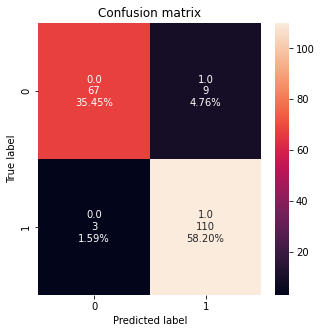

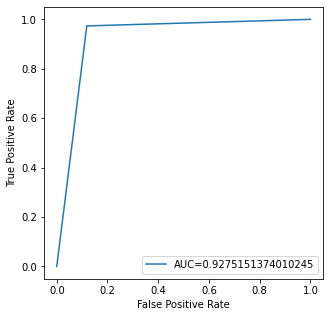


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.938485   0.937623  0.930314  0.933549
1   std  0.010834   0.011458  0.012509  0.011842
2   min  0.926316   0.922287  0.916586  0.919306
3   max  0.952632   0.949824  0.946842  0.948299


In [115]:
k_fold(X, y, model=EnsembleClassifier(GaussianNB()))

Results for Fold 1
Accuracy: 0.9421052631578948
 Macro precision: 0.9412307692307692
 Macro recall: 0.932135969141755 
 Macro f1-score: 0.9363794100636205


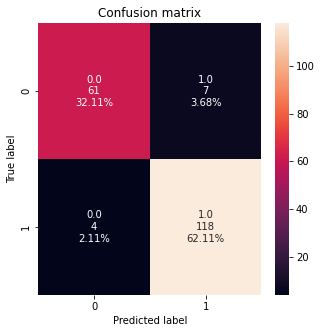

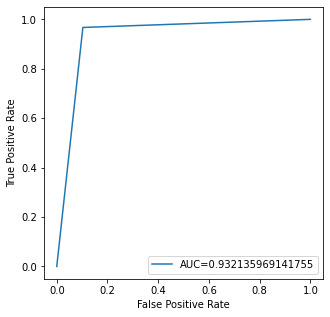

Results for Fold 2
Accuracy: 0.9473684210526315
 Macro precision: 0.945503421309873
 Macro recall: 0.9394889103182256 
 Macro f1-score: 0.9423613639121466


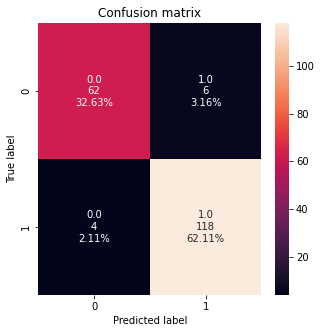

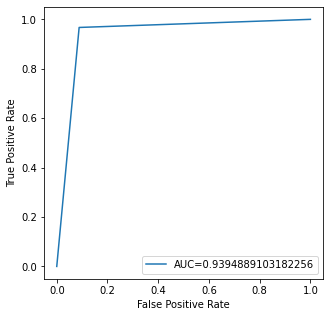

Results for Fold 3
Accuracy: 0.9259259259259259
 Macro precision: 0.9324866310160428
 Macro recall: 0.9143572426641826 
 Macro f1-score: 0.921474358974359


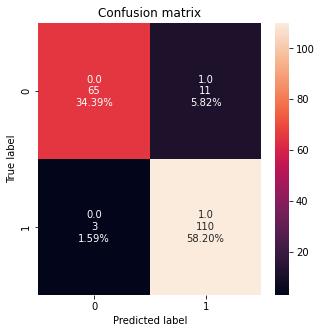

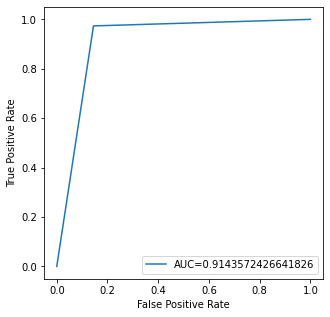


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.938467   0.939740  0.928661  0.933405
1   std  0.009124   0.005418  0.010550  0.008783
2   min  0.925926   0.932487  0.914357  0.921474
3   max  0.947368   0.945503  0.939489  0.942361


In [116]:
k_fold(X, y, model=BaggingClassifier(GaussianNB(), n_estimators=10, max_features = max_features))

In [117]:
bag = BaggingClassifier(GaussianNB(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(GaussianNB()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0328,
 'Odchylenie standardowe': 0.0402,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.2684}

### SVM

In [118]:
cv = cross_val_score(SVC(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.97,
 'Odchylenie standardowe': 0.01,
 'Wartość minimalna': 0.96,
 'Wartość maksymalna': 0.98}

Results for Fold 1
Accuracy: 0.9526315789473684
 Macro precision: 0.952923076923077
 Macro recall: 0.9435872709739633 
 Macro f1-score: 0.9479467900520532


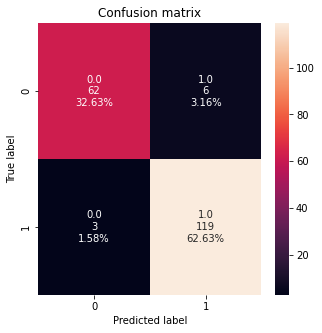

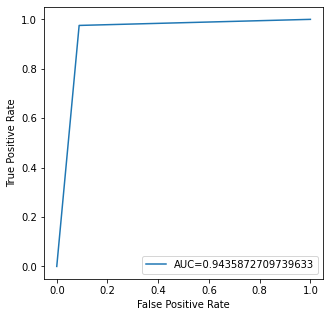

Results for Fold 2
Accuracy: 0.968421052631579
 Macro precision: 0.9765625
 Macro recall: 0.9558823529411764 
 Macro f1-score: 0.964923076923077


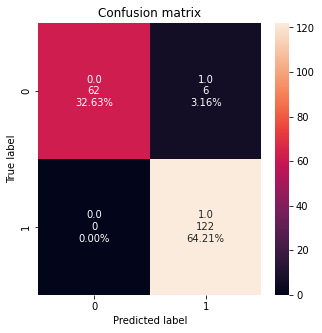

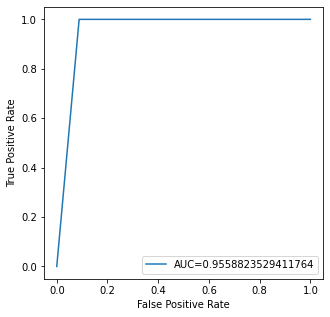

Results for Fold 3
Accuracy: 0.9523809523809523
 Macro precision: 0.9631147540983607
 Macro recall: 0.9407894736842105 
 Macro f1-score: 0.9493825323612558


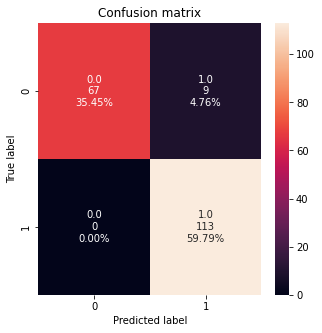

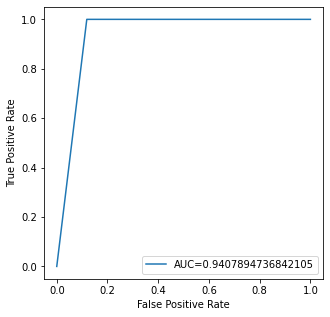


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.957811   0.964200  0.946753  0.954084
1   std  0.007503   0.009681  0.006556  0.007687
2   min  0.952381   0.952923  0.940789  0.947947
3   max  0.968421   0.976562  0.955882  0.964923


In [119]:
k_fold(X, y, model=EnsembleClassifier(SVC()))

Results for Fold 1
Accuracy: 0.9263157894736842
 Macro precision: 0.9222873900293255
 Macro recall: 0.916586306653809 
 Macro f1-score: 0.9193059094770052


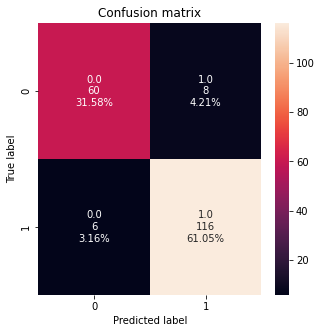

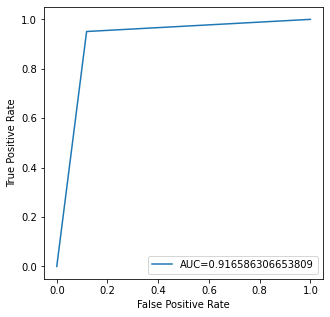

Results for Fold 2
Accuracy: 0.9578947368421052
 Macro precision: 0.9605654761904762
 Macro recall: 0.9476856316297011 
 Macro f1-score: 0.9535679374389052


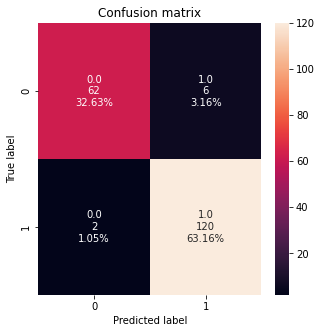

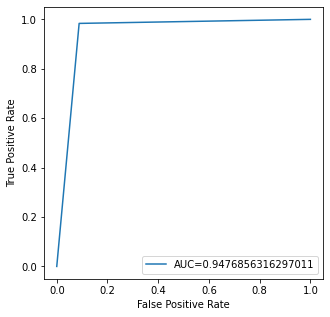

Results for Fold 3
Accuracy: 0.9576719576719577
 Macro precision: 0.9634453781512605
 Macro recall: 0.9495225896599907 
 Macro f1-score: 0.9553613604156825


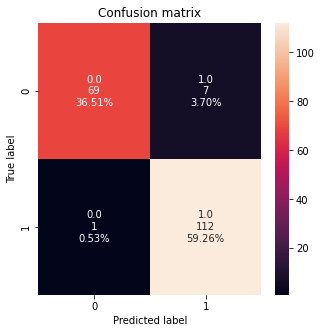

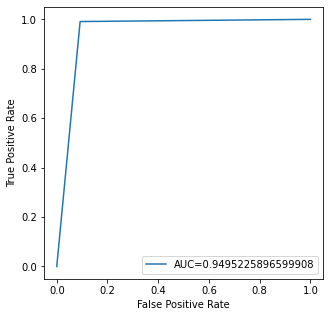


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.947294   0.948766  0.937932  0.942745
1   std  0.014834   0.018760  0.015112  0.016590
2   min  0.926316   0.922287  0.916586  0.919306
3   max  0.957895   0.963445  0.949523  0.955361


In [120]:
k_fold(X, y, model=BaggingClassifier(SVC(), n_estimators=10, max_features = max_features))

In [121]:
bag = BaggingClassifier(SVC(probability=True), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(SVC(probability=True)).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0354,
 'Odchylenie standardowe': 0.0471,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.2773}

# Zbiór Wine

In [122]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wines['data'])
X = pd.DataFrame(data=scaled_data, columns=wines['feature_names'])
y = wines['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
max_features=math.floor(math.sqrt(len(X.columns)))

{'Średnia': 0.9157,
 'Odchylenie standardowe': 0.0415,
 'Wartość minimalna': 0.8644,
 'Wartość maksymalna': 0.9661}

In [123]:
cv = cross_val_score(RandomForestClassifier(n_estimators=10), X, y, cv=3)
get_labeled_scores(cv, round_to=4)

{'Średnia': 0.9327,
 'Odchylenie standardowe': 0.0364,
 'Wartość minimalna': 0.8983,
 'Wartość maksymalna': 0.9831}

### K-najbliższych sąsiadów

In [124]:
cv = cross_val_score(KNeighborsClassifier(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.94,
 'Odchylenie standardowe': 0.02,
 'Wartość minimalna': 0.92,
 'Wartość maksymalna': 0.97}

Results for Fold 1
Accuracy: 0.9166666666666666
 Macro precision: 0.9202380952380952
 Macro recall: 0.9222222222222222 
 Macro f1-score: 0.9185185185185185


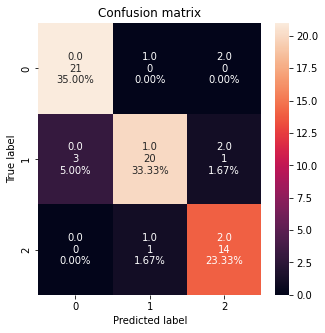

Results for Fold 2
Accuracy: 0.9661016949152542
 Macro precision: 0.9696969696969697
 Macro recall: 0.9710144927536232 
 Macro f1-score: 0.9689754689754689


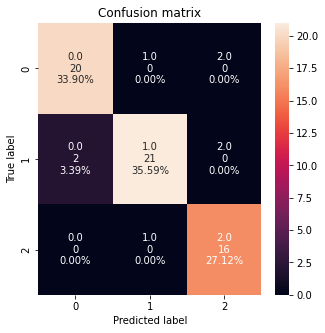

Results for Fold 3
Accuracy: 0.9830508474576272
 Macro precision: 0.9866666666666667
 Macro recall: 0.9803921568627452 
 Macro f1-score: 0.9830962688105546


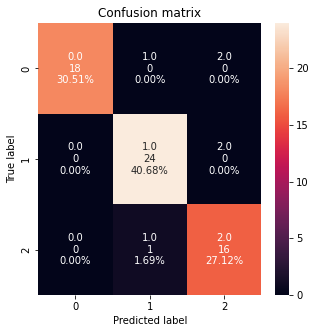


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.955273   0.958867  0.957876  0.956863
1   std  0.028162   0.028180  0.025500  0.027720
2   min  0.916667   0.920238  0.922222  0.918519
3   max  0.983051   0.986667  0.980392  0.983096


In [125]:
k_fold(X, y, model=EnsembleClassifier(KNeighborsClassifier()))

Results for Fold 1
Accuracy: 0.9666666666666667
 Macro precision: 0.970959595959596
 Macro recall: 0.9638888888888889 
 Macro f1-score: 0.9668649202530518


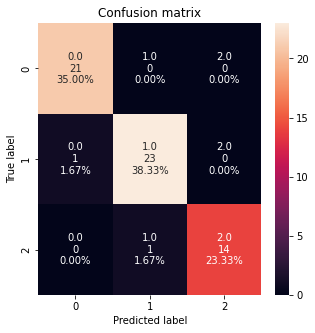

Results for Fold 2
Accuracy: 0.9491525423728814
 Macro precision: 0.9565217391304347
 Macro recall: 0.9565217391304347 
 Macro f1-score: 0.9534883720930232


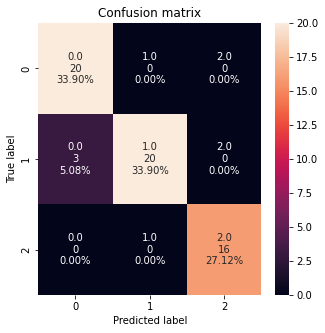

Results for Fold 3
Accuracy: 0.9661016949152542
 Macro precision: 0.9639376218323585
 Macro recall: 0.9722222222222222 
 Macro f1-score: 0.9669744278439931


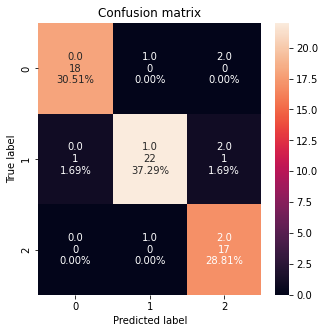


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.960640   0.963806  0.964211  0.962443
1   std  0.008126   0.005895  0.006414  0.006332
2   min  0.949153   0.956522  0.956522  0.953488
3   max  0.966667   0.970960  0.972222  0.966974


In [126]:
k_fold(X, y, model=BaggingClassifier(KNeighborsClassifier(), n_estimators=10, max_features = max_features))

In [127]:
bag = BaggingClassifier(KNeighborsClassifier(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(KNeighborsClassifier()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0832,
 'Odchylenie standardowe': 0.0725,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.3}

### Drzewo decyzyjne

In [128]:
cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.87,
 'Odchylenie standardowe': 0.04,
 'Wartość minimalna': 0.83,
 'Wartość maksymalna': 0.93}

Results for Fold 1
Accuracy: 0.9666666666666667
 Macro precision: 0.9640151515151515
 Macro recall: 0.9722222222222222 
 Macro f1-score: 0.9670026202202725


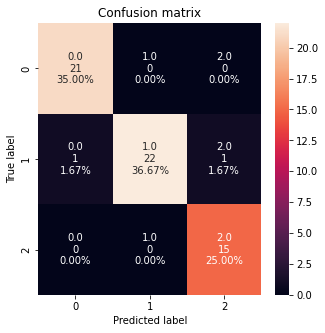

Results for Fold 2
Accuracy: 1.0
 Macro precision: 1.0
 Macro recall: 1.0 
 Macro f1-score: 1.0


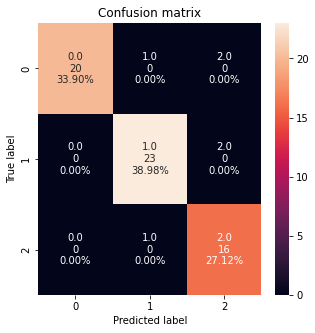

Results for Fold 3
Accuracy: 1.0
 Macro precision: 1.0
 Macro recall: 1.0 
 Macro f1-score: 1.0


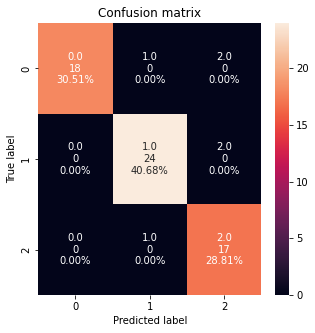


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.988889   0.988005  0.990741  0.989001
1   std  0.015713   0.016963  0.013095  0.015555
2   min  0.966667   0.964015  0.972222  0.967003
3   max  1.000000   1.000000  1.000000  1.000000


In [129]:
k_fold(X, y, model=EnsembleClassifier(DecisionTreeClassifier()))

Results for Fold 1
Accuracy: 0.9333333333333333
 Macro precision: 0.9463869463869464
 Macro recall: 0.9194444444444446 
 Macro f1-score: 0.9285443583118002


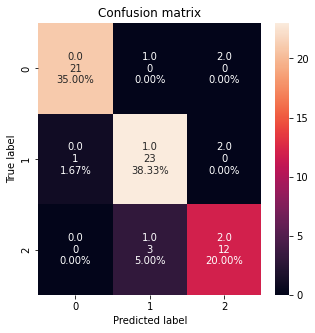

Results for Fold 2
Accuracy: 0.9491525423728814
 Macro precision: 0.9481421356421356
 Macro recall: 0.9501811594202899 
 Macro f1-score: 0.9488143631436313


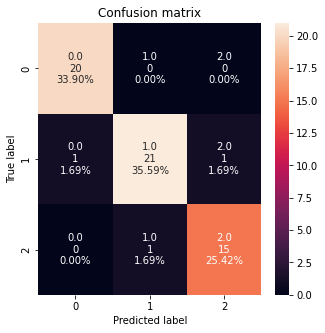

Results for Fold 3
Accuracy: 0.9322033898305084
 Macro precision: 0.943019943019943
 Macro recall: 0.9283769063180828 
 Macro f1-score: 0.9339814814814815


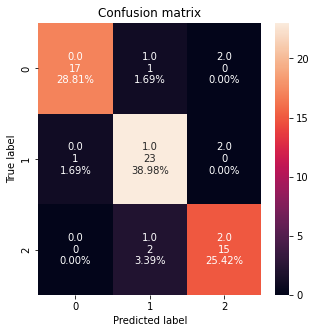


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.938230   0.945850  0.932668  0.937113
1   std  0.007737   0.002125  0.012910  0.008566
2   min  0.932203   0.943020  0.919444  0.928544
3   max  0.949153   0.948142  0.950181  0.948814


In [130]:
k_fold(X, y, model=BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, max_features = max_features))

In [131]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(DecisionTreeClassifier()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0949,
 'Odchylenie standardowe': 0.1161,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.6}

### Regresja logistyczna

In [132]:
cv = cross_val_score(LogisticRegression(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.98,
 'Odchylenie standardowe': 0.02,
 'Wartość minimalna': 0.97,
 'Wartość maksymalna': 1.0}

Results for Fold 1
Accuracy: 0.9666666666666667
 Macro precision: 0.970959595959596
 Macro recall: 0.9638888888888889 
 Macro f1-score: 0.9668649202530518


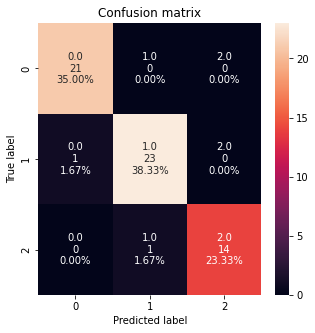

Results for Fold 2
Accuracy: 0.9491525423728814
 Macro precision: 0.9531024531024531
 Macro recall: 0.9543478260869565 
 Macro f1-score: 0.9533875338753387


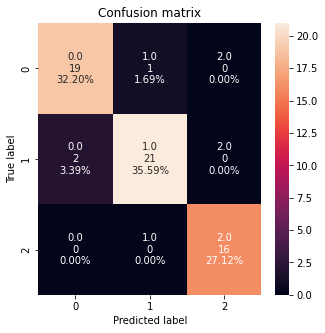

Results for Fold 3
Accuracy: 0.9830508474576272
 Macro precision: 0.9866666666666667
 Macro recall: 0.9814814814814815 
 Macro f1-score: 0.983673469387755


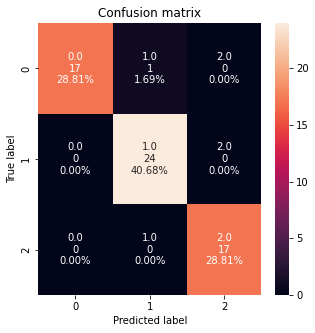


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.966290   0.970243  0.966573  0.967975
1   std  0.013841   0.013712  0.011239  0.012389
2   min  0.949153   0.953102  0.954348  0.953388
3   max  0.983051   0.986667  0.981481  0.983673


In [133]:
k_fold(X, y, model=EnsembleClassifier(LogisticRegression()))

Results for Fold 1
Accuracy: 0.9666666666666667
 Macro precision: 0.9702380952380952
 Macro recall: 0.9702380952380952 
 Macro f1-score: 0.9702380952380952


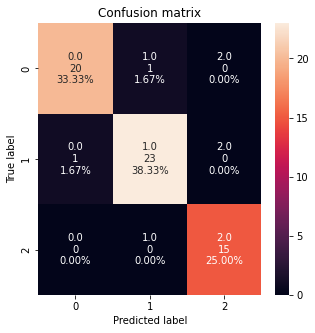

Results for Fold 2
Accuracy: 0.9830508474576272
 Macro precision: 0.9861111111111112
 Macro recall: 0.9833333333333334 
 Macro f1-score: 0.9843607928714312


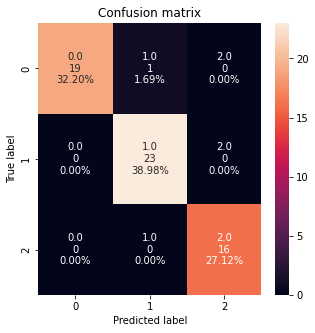

Results for Fold 3
Accuracy: 0.9661016949152542
 Macro precision: 0.9639376218323585
 Macro recall: 0.9722222222222222 
 Macro f1-score: 0.9669744278439931


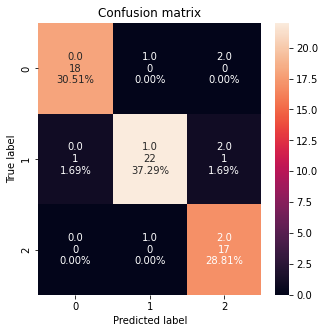


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.971940   0.973429  0.975265  0.973858
1   std  0.007860   0.009329  0.005763  0.007545
2   min  0.966102   0.963938  0.970238  0.966974
3   max  0.983051   0.986111  0.983333  0.984361


In [134]:
k_fold(X, y, model=BaggingClassifier(LogisticRegression(), n_estimators=10, max_features = max_features))

In [135]:
bag = BaggingClassifier(LogisticRegression(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(LogisticRegression()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0525,
 'Odchylenie standardowe': 0.045,
 'Wartość minimalna': 0.0007,
 'Wartość maksymalna': 0.24}

### Naiwny klasyfikator bayesowski

In [136]:
cv = cross_val_score(GaussianNB(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.96,
 'Odchylenie standardowe': 0.01,
 'Wartość minimalna': 0.95,
 'Wartość maksymalna': 0.97}

Results for Fold 1
Accuracy: 0.95
 Macro precision: 0.9488008971704623
 Macro recall: 0.9563492063492064 
 Macro f1-score: 0.9520977002102602


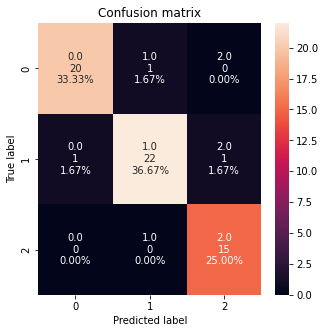

Results for Fold 2
Accuracy: 0.9322033898305084
 Macro precision: 0.9338627899672455
 Macro recall: 0.9376811594202898 
 Macro f1-score: 0.9352724570115875


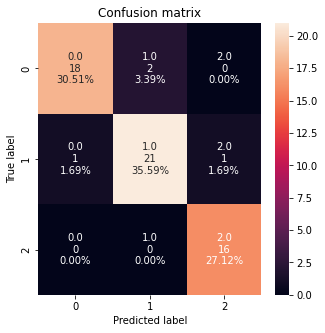

Results for Fold 3
Accuracy: 0.9661016949152542
 Macro precision: 0.9649122807017544
 Macro recall: 0.9722222222222222 
 Macro f1-score: 0.966988727858293


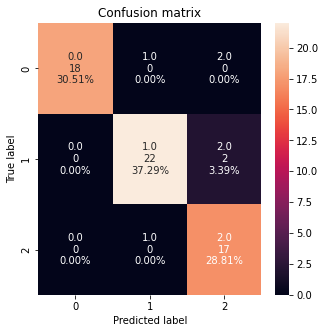


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.949435   0.949192  0.955418  0.951453
1   std  0.013845   0.012679  0.014117  0.012956
2   min  0.932203   0.933863  0.937681  0.935272
3   max  0.966102   0.964912  0.972222  0.966989


In [137]:
k_fold(X, y, model=EnsembleClassifier(GaussianNB()))

Results for Fold 1
Accuracy: 0.9333333333333333
 Macro precision: 0.9456654456654455
 Macro recall: 0.9257936507936507 
 Macro f1-score: 0.9336507936507936


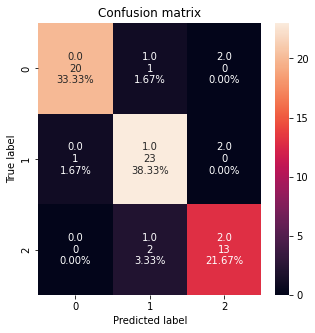

Results for Fold 2
Accuracy: 0.9322033898305084
 Macro precision: 0.9338627899672455
 Macro recall: 0.9376811594202898 
 Macro f1-score: 0.9352724570115875


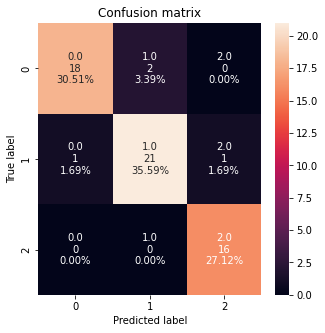

Results for Fold 3
Accuracy: 0.8983050847457628
 Macro precision: 0.89640768588137
 Macro recall: 0.9063180827886711 
 Macro f1-score: 0.898898898898899


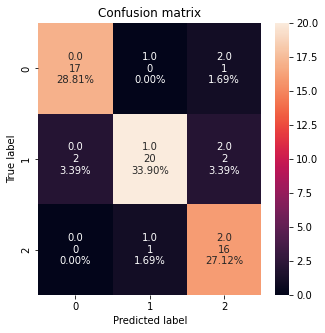


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.921281   0.925312  0.923264  0.922607
1   std  0.016253   0.020999  0.012928  0.016777
2   min  0.898305   0.896408  0.906318  0.898899
3   max  0.933333   0.945665  0.937681  0.935272


In [138]:
k_fold(X, y, model=BaggingClassifier(GaussianNB(), n_estimators=10, max_features = max_features))

In [139]:
bag = BaggingClassifier(GaussianNB(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(GaussianNB()).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0764,
 'Odchylenie standardowe': 0.0765,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.4881}

### SVM

In [140]:
cv = cross_val_score(SVC(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.98,
 'Odchylenie standardowe': 0.02,
 'Wartość minimalna': 0.95,
 'Wartość maksymalna': 1.0}

Results for Fold 1
Accuracy: 0.9333333333333333
 Macro precision: 0.925911286780852
 Macro recall: 0.9277777777777777 
 Macro f1-score: 0.9265270218263786


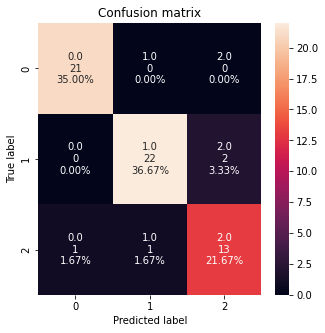

Results for Fold 2
Accuracy: 0.9661016949152542
 Macro precision: 0.9645191409897292
 Macro recall: 0.9710144927536232 
 Macro f1-score: 0.9666173934466618


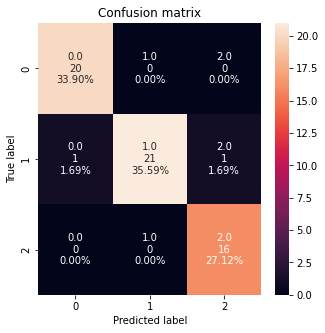

Results for Fold 3
Accuracy: 1.0
 Macro precision: 1.0
 Macro recall: 1.0 
 Macro f1-score: 1.0


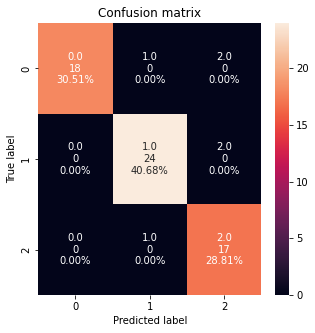


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.966478   0.963477  0.966264  0.964381
1   std  0.027218   0.030256  0.029675  0.030037
2   min  0.933333   0.925911  0.927778  0.926527
3   max  1.000000   1.000000  1.000000  1.000000


In [141]:
k_fold(X, y, model=EnsembleClassifier(SVC()))

Results for Fold 1
Accuracy: 1.0
 Macro precision: 1.0
 Macro recall: 1.0 
 Macro f1-score: 1.0


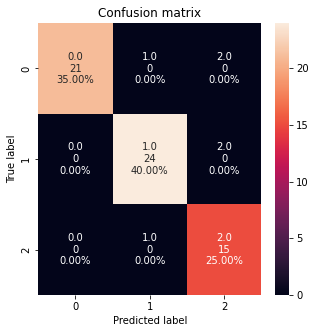

Results for Fold 2
Accuracy: 0.9830508474576272
 Macro precision: 0.9861111111111112
 Macro recall: 0.9833333333333334 
 Macro f1-score: 0.9843607928714312


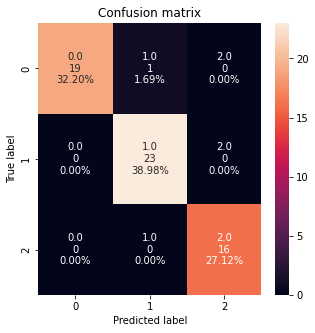

Results for Fold 3
Accuracy: 0.9322033898305084
 Macro precision: 0.9319073083778967
 Macro recall: 0.9387254901960785 
 Macro f1-score: 0.9338627899672455


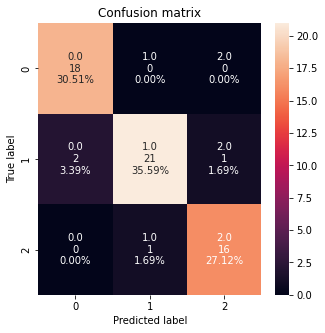


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.971751   0.972673  0.974020  0.972741
1   std  0.028808   0.029378  0.025868  0.028223
2   min  0.932203   0.931907  0.938725  0.933863
3   max  1.000000   1.000000  1.000000  1.000000


In [142]:
k_fold(X, y, model=BaggingClassifier(SVC(), n_estimators=10, max_features = max_features))

In [143]:
bag = BaggingClassifier(SVC(probability=True), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(SVC(probability=True)).fit(X_train, y_train)
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.06,
 'Odchylenie standardowe': 0.0487,
 'Wartość minimalna': 0.0002,
 'Wartość maksymalna': 0.2158}

# Zbiór Diabetes

In [52]:
y = diabetes['Outcome']
X = diabetes.drop(['Outcome'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(data=scaled_data, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
max_features=math.floor(math.sqrt(len(X.columns)))

In [160]:
cv = cross_val_score(RandomForestClassifier(n_estimators=10), X, y, cv=3)
get_labeled_scores(cv, round_to=4)

{'Średnia': 0.6927,
 'Odchylenie standardowe': 0.0531,
 'Wartość minimalna': 0.6406,
 'Wartość maksymalna': 0.7656}

### K-najbliższych sąsiadów

In [155]:
cv = cross_val_score(KNeighborsClassifier(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.73,
 'Odchylenie standardowe': 0.01,
 'Wartość minimalna': 0.72,
 'Wartość maksymalna': 0.74}

Results for Fold 1
Accuracy: 0.71875
 Macro precision: 0.6889320388349515
 Macro recall: 0.6331053351573188 
 Macro f1-score: 0.639549436795995


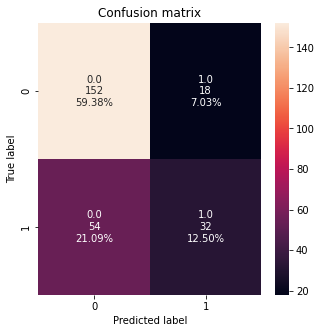

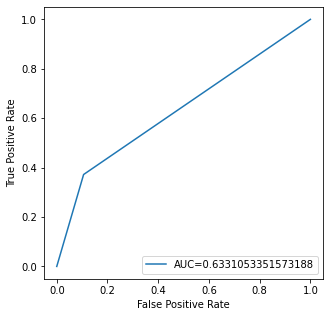

Results for Fold 2
Accuracy: 0.82421875
 Macro precision: 0.856584635849684
 Macro recall: 0.7780911625494391 
 Macro f1-score: 0.7947511892671976


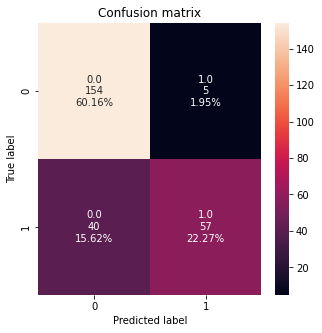

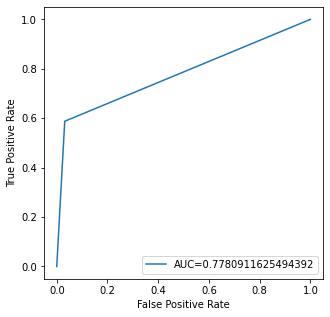

Results for Fold 3
Accuracy: 0.82421875
 Macro precision: 0.8673913043478261
 Macro recall: 0.7441692466460268 
 Macro f1-score: 0.7691891566989241


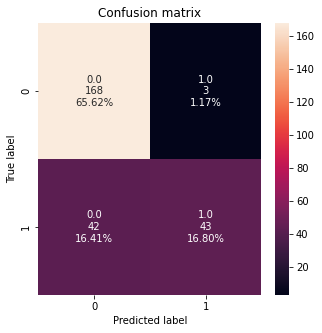

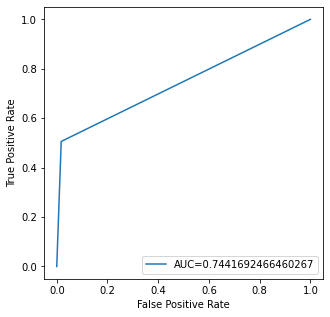


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.789062   0.804303  0.718455  0.734497
1   std  0.049718   0.081699  0.061920  0.067944
2   min  0.718750   0.688932  0.633105  0.639549
3   max  0.824219   0.867391  0.778091  0.794751


In [156]:
k_fold(X, y, model=EnsembleClassifier(KNeighborsClassifier()))

Results for Fold 1
Accuracy: 0.71875
 Macro precision: 0.685
 Macro recall: 0.6417236662106703 
 Macro f1-score: 0.6491815759421393


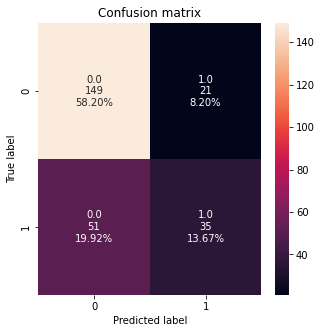

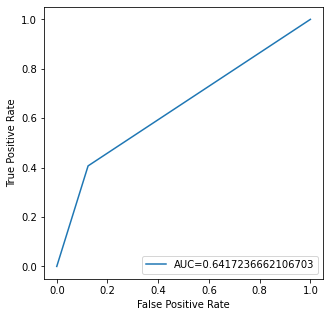

Results for Fold 2
Accuracy: 0.67578125
 Macro precision: 0.6885267620561739
 Macro recall: 0.5922647993256824 
 Macro f1-score: 0.5742822223557933


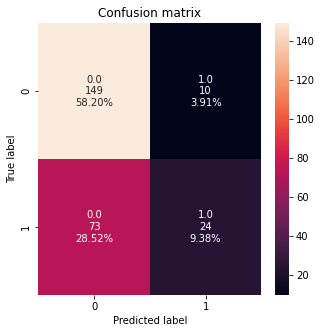

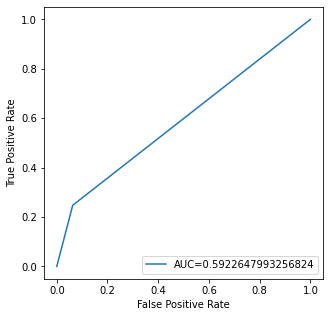

Results for Fold 3
Accuracy: 0.6953125
 Macro precision: 0.6484780616919474
 Macro recall: 0.600343997248022 
 Macro f1-score: 0.6019138755980862


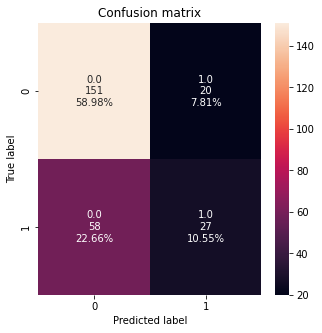

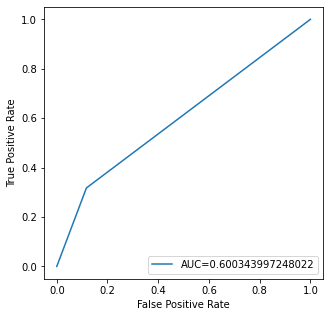


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.696615   0.674002  0.611444  0.608459
1   std  0.017566   0.018105  0.021663  0.030926
2   min  0.675781   0.648478  0.592265  0.574282
3   max  0.718750   0.688527  0.641724  0.649182


In [157]:
k_fold(X, y, model=BaggingClassifier(KNeighborsClassifier(), n_estimators=10, max_features = max_features))

In [51]:
bag = BaggingClassifier(KNeighborsClassifier(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(KNeighborsClassifier()).fit(X_train, np.array(y_train))
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0789,
 'Odchylenie standardowe': 0.0626,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.3}

### Drzewo decyzyjne

In [53]:
cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.68,
 'Odchylenie standardowe': 0.01,
 'Wartość minimalna': 0.67,
 'Wartość maksymalna': 0.7}

Results for Fold 1
Accuracy: 0.671875
 Macro precision: 0.6150075414781297
 Macro recall: 0.5834473324213406 
 Macro f1-score: 0.5833527086724017


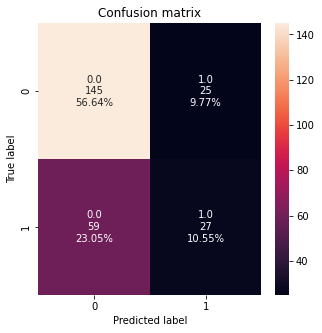

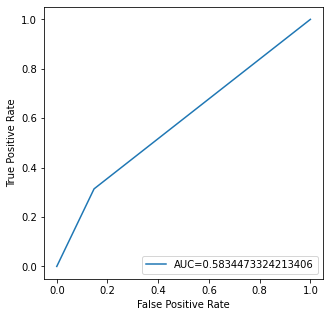

Results for Fold 2
Accuracy: 0.86328125
 Macro precision: 0.898006379585327
 Macro recall: 0.8236075990403942 
 Macro f1-score: 0.8424947703341712


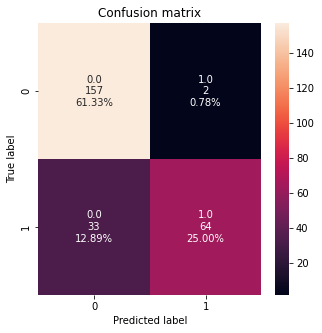

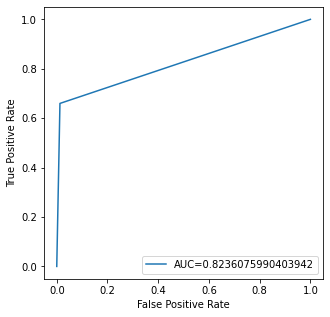

Results for Fold 3
Accuracy: 0.91796875
 Macro precision: 0.9453125
 Macro recall: 0.8764705882352941 
 Macro f1-score: 0.9006045815075712


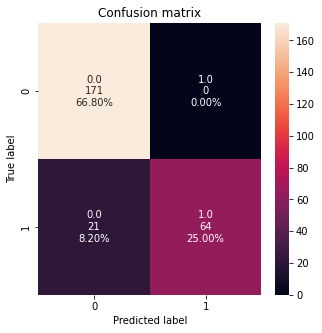

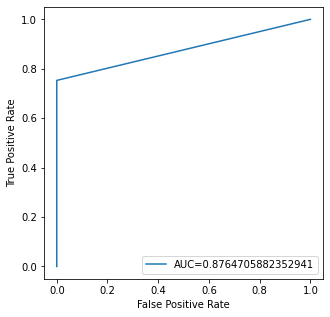


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.817708   0.819442  0.761175  0.775484
1   std  0.105509   0.145841  0.127512  0.137913
2   min  0.671875   0.615008  0.583447  0.583353
3   max  0.917969   0.945312  0.876471  0.900605


In [54]:
k_fold(X, y, model=EnsembleClassifier(DecisionTreeClassifier()))

Results for Fold 1
Accuracy: 0.6796875
 Macro precision: 0.6295310941137346
 Macro recall: 0.6065663474692202 
 Macro f1-score: 0.6103356103356103


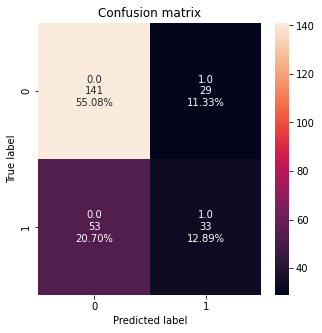

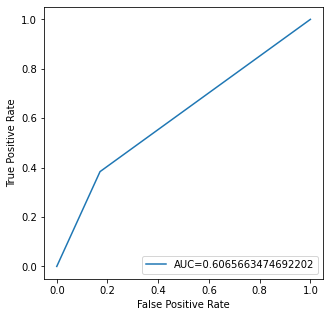

Results for Fold 2
Accuracy: 0.71875
 Macro precision: 0.7474615132656404
 Macro recall: 0.64695584516631 
 Macro f1-score: 0.6460829493087558


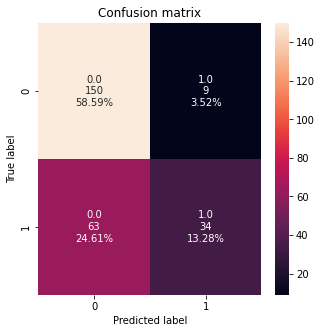

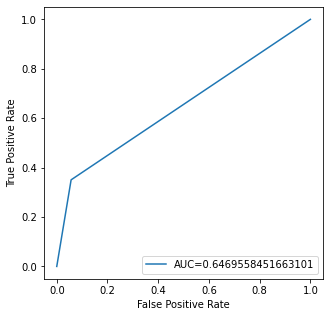

Results for Fold 3
Accuracy: 0.68359375
 Macro precision: 0.629524886877828
 Macro recall: 0.5945304437564499 
 Macro f1-score: 0.5963795620437955


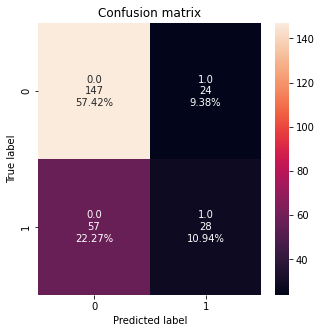

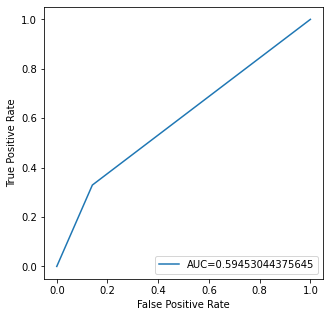


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.694010   0.668839  0.616018  0.617599
1   std  0.017566   0.055594  0.022422  0.020931
2   min  0.679688   0.629525  0.594530  0.596380
3   max  0.718750   0.747462  0.646956  0.646083


In [55]:
k_fold(X, y, model=BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, max_features = max_features))

In [56]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(DecisionTreeClassifier()).fit(X_train, np.array(y_train))
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.138,
 'Odchylenie standardowe': 0.1049,
 'Wartość minimalna': 0.0,
 'Wartość maksymalna': 0.55}

### Regresja logistyczna

In [57]:
cv = cross_val_score(LogisticRegression(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.77,
 'Odchylenie standardowe': 0.02,
 'Wartość minimalna': 0.75,
 'Wartość maksymalna': 0.8}

Results for Fold 1
Accuracy: 0.6953125
 Macro precision: 0.6974576271186441
 Macro recall: 0.5637482900136799 
 Macro f1-score: 0.5360163583976206


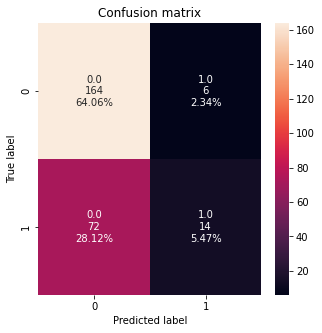

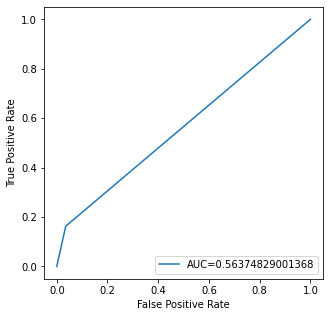

Results for Fold 2
Accuracy: 0.6328125
 Macro precision: 0.6491228070175439
 Macro recall: 0.5214938727873955 
 Macro f1-score: 0.44084022678687607


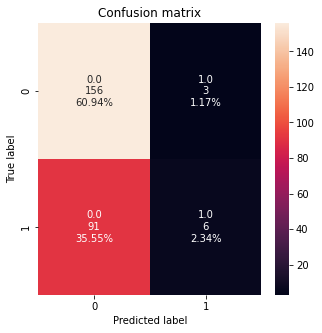

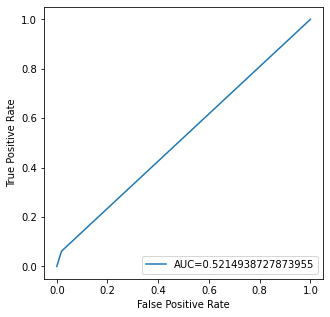

Results for Fold 3
Accuracy: 0.703125
 Macro precision: 0.8014842300556586
 Macro recall: 0.5558995528035775 
 Macro f1-score: 0.5128205128205128


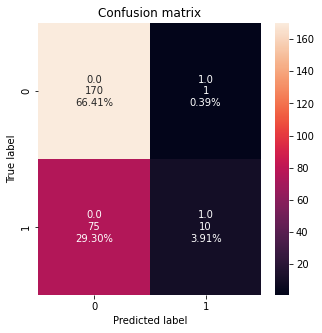

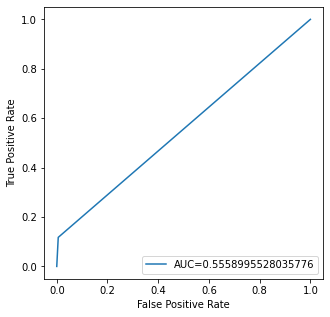


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.677083   0.716022  0.547047  0.496559
1   std  0.031466   0.063571  0.018351  0.040521
2   min  0.632812   0.649123  0.521494  0.440840
3   max  0.703125   0.801484  0.563748  0.536016


In [58]:
k_fold(X, y, model=EnsembleClassifier(LogisticRegression()))

Results for Fold 1
Accuracy: 0.6640625
 Macro precision: 0.5945945945945945
 Macro recall: 0.5488372093023256 
 Macro f1-score: 0.5319727891156463


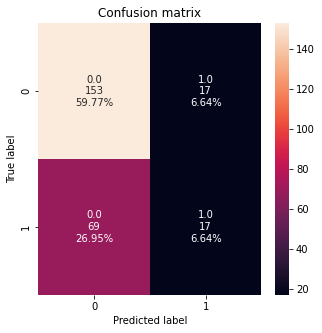

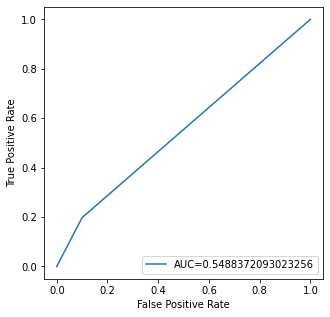

Results for Fold 2
Accuracy: 0.703125
 Macro precision: 0.7615770609318997
 Macro recall: 0.6182973481164494 
 Macro f1-score: 0.6041666666666666


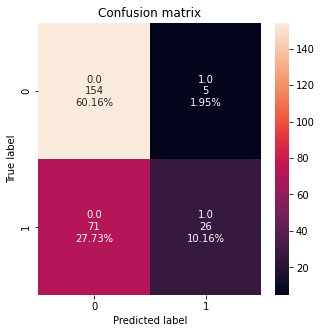

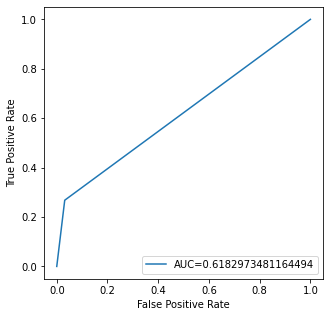

Results for Fold 3
Accuracy: 0.7109375
 Macro precision: 0.734143870314083
 Macro recall: 0.5794977640178878 
 Macro f1-score: 0.5598103913003067


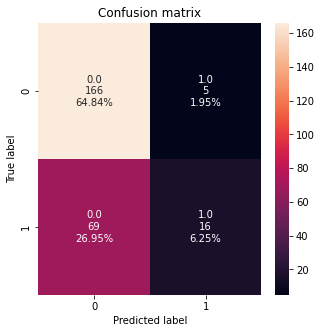

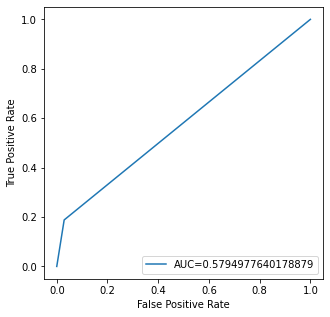


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.692708   0.696772  0.582211  0.565317
1   std  0.020505   0.073113  0.028422  0.029729
2   min  0.664062   0.594595  0.548837  0.531973
3   max  0.710938   0.761577  0.618297  0.604167


In [59]:
k_fold(X, y, model=BaggingClassifier(LogisticRegression(), n_estimators=10, max_features = max_features))

In [61]:
bag = BaggingClassifier(LogisticRegression(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(LogisticRegression()).fit(X_train, np.array(y_train))
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0757,
 'Odchylenie standardowe': 0.0554,
 'Wartość minimalna': 0.0007,
 'Wartość maksymalna': 0.248}

### Naiwny klasyfikator bayesowski

In [62]:
cv = cross_val_score(GaussianNB(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.74,
 'Odchylenie standardowe': 0.03,
 'Wartość minimalna': 0.71,
 'Wartość maksymalna': 0.78}

Results for Fold 1
Accuracy: 0.70703125
 Macro precision: 0.6994531368676895
 Macro recall: 0.5898084815321477 
 Macro f1-score: 0.5794546051911071


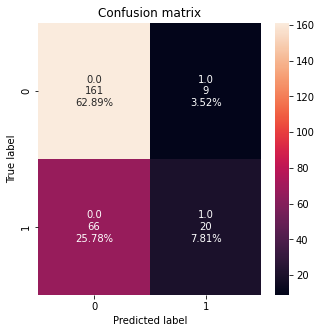

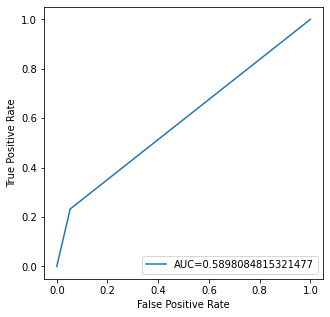

Results for Fold 2
Accuracy: 0.64453125
 Macro precision: 0.6773907910271546
 Macro recall: 0.5389677754003761 
 Macro f1-score: 0.4766237559255016


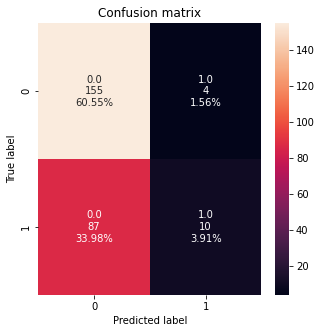

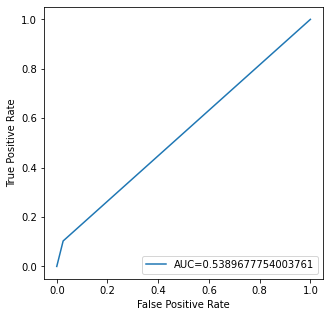

Results for Fold 3
Accuracy: 0.70703125
 Macro precision: 0.75625
 Macro recall: 0.5676986584107326 
 Macro f1-score: 0.53747199537472


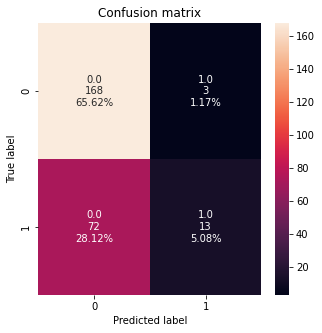

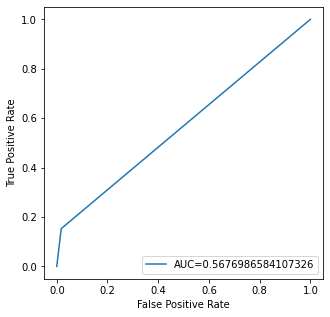


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.686198   0.711031  0.565492  0.531183
1   std  0.029463   0.033219  0.020814  0.042215
2   min  0.644531   0.677391  0.538968  0.476624
3   max  0.707031   0.756250  0.589808  0.579455


In [63]:
k_fold(X, y, model=EnsembleClassifier(GaussianNB()))

Results for Fold 1
Accuracy: 0.7421875
 Macro precision: 0.7175200278648555
 Macro recall: 0.6708618331053351 
 Macro f1-score: 0.6811594202898551


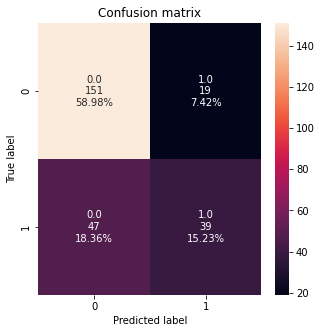

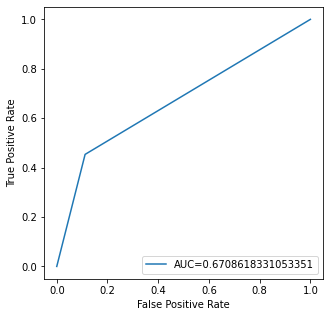

Results for Fold 2
Accuracy: 0.6640625
 Macro precision: 0.6815461749959566
 Macro recall: 0.5727809116254944 
 Macro f1-score: 0.5424010641835717


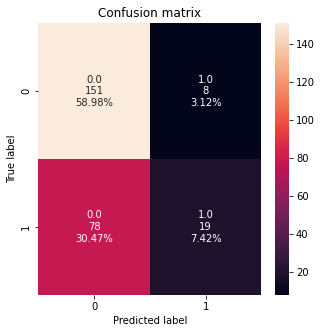

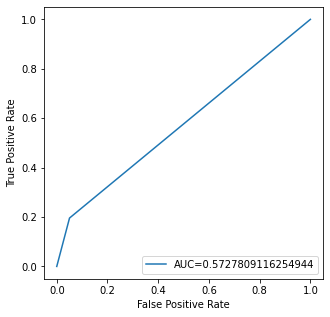

Results for Fold 3
Accuracy: 0.71484375
 Macro precision: 0.7895833333333333
 Macro recall: 0.5765049879600963 
 Macro f1-score: 0.5498060754980608


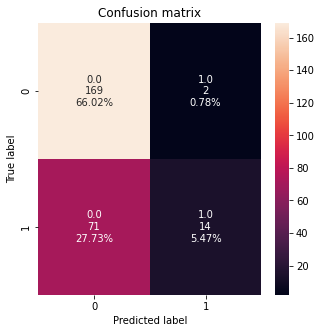

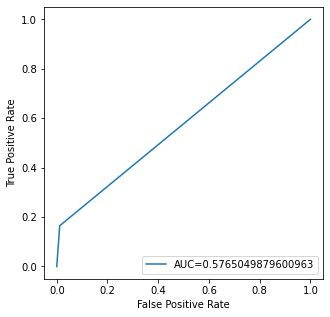


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.707031   0.729550  0.606716  0.591122
1   std  0.032369   0.044919  0.045383  0.063738
2   min  0.664062   0.681546  0.572781  0.542401
3   max  0.742188   0.789583  0.670862  0.681159


In [64]:
k_fold(X, y, model=BaggingClassifier(GaussianNB(), n_estimators=10, max_features = max_features))

In [65]:
bag = BaggingClassifier(GaussianNB(), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(GaussianNB()).fit(X_train, np.array(y_train))
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0603,
 'Odchylenie standardowe': 0.0535,
 'Wartość minimalna': 0.0002,
 'Wartość maksymalna': 0.2755}

### SVM

In [66]:
cv = cross_val_score(SVC(), X, y, cv=3)
get_labeled_scores(cv)

{'Średnia': 0.77,
 'Odchylenie standardowe': 0.02,
 'Wartość minimalna': 0.75,
 'Wartość maksymalna': 0.8}

Results for Fold 1
Accuracy: 0.6640625
 Macro precision: 0.5867768595041323
 Macro recall: 0.520109439124487 
 Macro f1-score: 0.46563106796116505


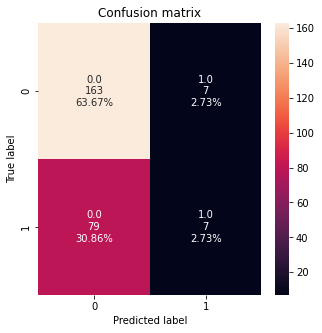

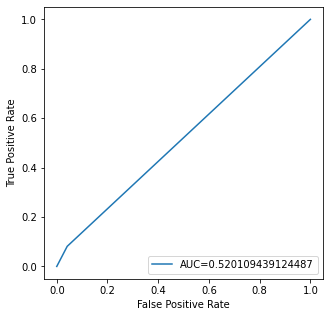

Results for Fold 2
Accuracy: 0.62890625
 Macro precision: 0.6473333333333333
 Macro recall: 0.5143292485249303 
 Macro f1-score: 0.42269803214090723


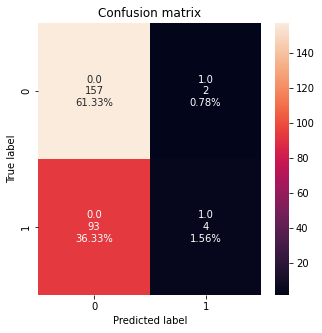

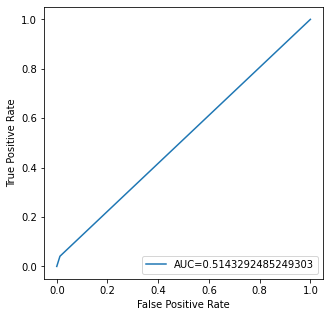

Results for Fold 3
Accuracy: 0.70703125
 Macro precision: 0.75625
 Macro recall: 0.5676986584107326 
 Macro f1-score: 0.53747199537472


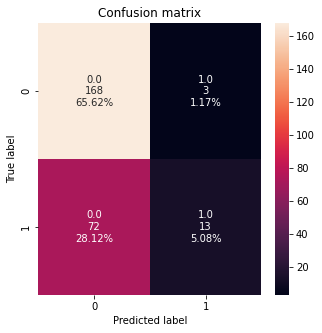

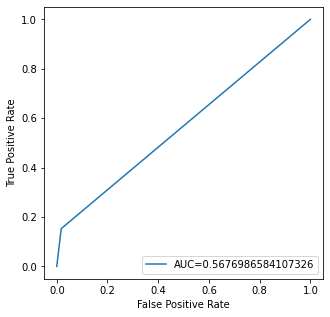


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.666667   0.663453  0.534046  0.475267
1   std  0.031948   0.070120  0.023913  0.047349
2   min  0.628906   0.586777  0.514329  0.422698
3   max  0.707031   0.756250  0.567699  0.537472


In [67]:
k_fold(X, y, model=EnsembleClassifier(SVC()))

Results for Fold 1
Accuracy: 0.71484375
 Macro precision: 0.7349783549783551
 Macro recall: 0.5928180574555404 
 Macro f1-score: 0.580148727280897


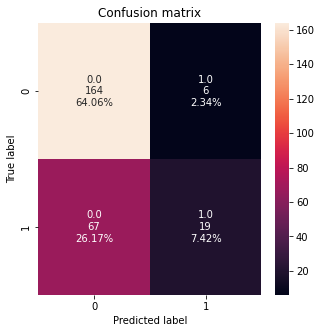

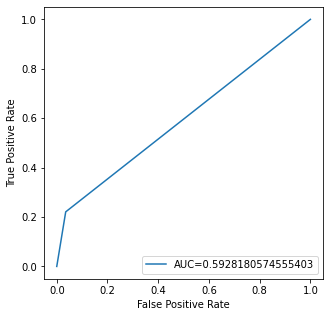

Results for Fold 2
Accuracy: 0.62890625
 Macro precision: 0.812992125984252
 Macro recall: 0.5103092783505154 
 Macro f1-score: 0.40518991366449


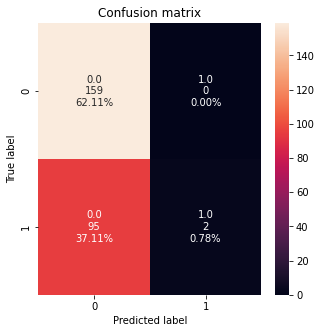

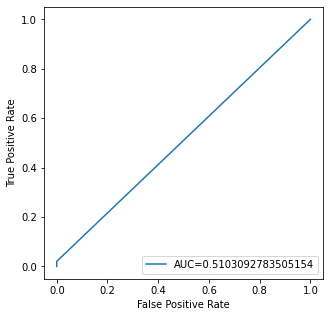

Results for Fold 3
Accuracy: 0.72265625
 Macro precision: 0.7433110367892977
 Macro recall: 0.6001031991744066 
 Macro f1-score: 0.5916515018759407


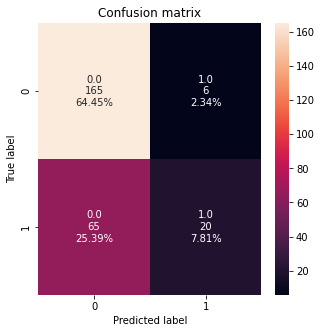

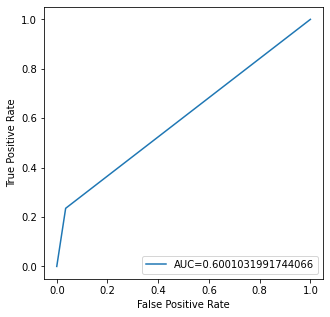


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.688802   0.763761  0.567744  0.525663
1   std  0.042473   0.034978  0.040721  0.085317
2   min  0.628906   0.734978  0.510309  0.405190
3   max  0.722656   0.812992  0.600103  0.591652


In [68]:
k_fold(X, y, model=BaggingClassifier(SVC(), n_estimators=10, max_features = max_features))

In [69]:
bag = BaggingClassifier(SVC(probability=True), max_features=max_features).fit(X_train, y_train)
ensemble = EnsembleClassifier(SVC(probability=True)).fit(X_train, np.array(y_train))
get_labeled_scores(np.abs(ensemble.predict_proba(X_test)-bag.predict_proba(X_test)), 4)

{'Średnia': 0.0252,
 'Odchylenie standardowe': 0.0231,
 'Wartość minimalna': 0.0001,
 'Wartość maksymalna': 0.1087}